<a id='top'><a/>
# Table of Contents
#### 1) Transforming time series data into de-trended, scaled and normalised format for classification. 
   [Experiment 1.1 - grouping all companies as a whole for one transformation.](#expt1.1)

   [Experiment 2.2 - individually transforming within companies across the same time-frame](#expt1.2)

#### 2) Use Statistics 
   [Experiment 2.1 - MANOVA](#expt2.1)
#### 3) Use Cluster Analysis 
   [Experiment 3.1 - k-means](#expt3.1)

   [Appendix](#appendix)

### Data Preprocessing

In [1]:
# import dataframe and libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# GridSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

from IPython.display import display
from IPython.core import display as ICD

In [17]:
main_df = pd.read_csv('abt.csv')
main_df.set_index(['Year', 'Quarter'], drop=True, inplace=True)
main_df.sort_index(ascending=True, sort_remaining= True, inplace=True)

In [3]:
main_df.groupby(main_df['company_name'], sort=True).sum()

Accounts Receivable     Inventory  Total current assets  \
company_name                                                            
Amazon               2.829430e+11  3.825570e+11          1.428235e+12   
Apple                3.975220e+11  8.578300e+10          2.800189e+12   
Facebook             1.021680e+11  0.000000e+00          8.812530e+11   
Ford                 4.271477e+12  3.004110e+11          3.144905e+12   
GM                   1.644996e+12  5.700550e+11          3.200108e+12   
Google               3.111810e+11  1.197800e+10          2.279091e+12   
Microsoft            5.313600e+11  7.394500e+10          4.296721e+12   
Netflix              0.000000e+00  8.930012e+13          4.731783e+13   
Tesla                1.344071e+10  5.293356e+10          1.465474e+11   

              Total current liabilities  Total liabilities  Common Stock  \
company_name                                                               
Amazon                     1.301270e+12       2.219730e+12  2.410000e+08   
Apple                      2.125556e+12       5.016973e+12  8.655780e+11   
Facebook                   1.201380e+11       2.715360e+11  0.000000e+00   
Ford                       2.622717e+12       6.070087e+12  1.188000e+09   
GM                         2.963690e+12       6.241944e+12  5.930000e+08   
Google                     5.004500e+11       8.594560e+11  7.801800e+11   
Microsoft                  1.558512e+12       3.847046e+12  2.248386e+12   
Netflix                    3.558797e+13       9.812288e+13  9.938387e+12   
Tesla                      1.450426e+11       3.730633e+11  2.932000e+06   

              Total liabilities and equity  New Deferred Revenue  \
company_name                                                       
Amazon                       3044300000000          1.271290e+11   
Apple                        8110972000000          2.627400e+11   
Facebook                     1752395000000          2.474000e+09   
Ford                         6941199000000          1.209010e+12   
GM                           7959308000000          1.268860e+12   
Google                       3849115000000          3.170500e+10   
Microsoft                    6524922000000          8.558170e+11   
Netflix                    124929670160000          4.226629e+12   
Tesla                         477577304000          3.292231e+10   

              New Property and Equipment  Total Non-Current Assets  \
company_name                                                         
Amazon                      1.046805e+12              2.108220e+11   
Apple                       7.421370e+11              1.740391e+12   
Facebook                    3.430340e+11              8.617100e+10   
Ford                        9.493500e+11              3.796294e+12   
GM                          2.115283e+12              4.846485e+12   
Google                      9.026310e+11              5.296800e+10   
Microsoft                   6.628030e+11              3.780890e+11   
Netflix                     2.671635e+12              5.674708e+12   
Tesla                       1.611449e+11              1.146351e+10   

              Total_Assets  Non-Current Liabilities  \
company_name                                          
Amazon        3.044300e+12             9.184600e+11   
Apple         8.110972e+12             2.184731e+12   
Facebook      1.752395e+12             1.097640e+11   
Ford          6.941199e+12             1.301248e+12   
GM            7.959308e+12             3.278254e+12   
Google        3.849115e+12             6.940200e+10   
Microsoft     6.524922e+12             1.406331e+12   
Netflix       1.249297e+14             2.205699e+12   
Tesla         4.775773e+11             1.749331e+11   

              Total Shareholder's Equity  Accounts Payables  Retained Earning  \
company_name                                                                    
Amazon                      8.245700e+11       7.327650e+11      2.964710e+11   
Appl

In [26]:
#  Delete columns that will not be needed in Experiment 1.1.
main_df_1_1 = main_df.copy()
main_df_1_1.drop('Filing/Acc.No.', axis=1, inplace=True)
main_df_1_1.drop('company_name', axis=1, inplace=True)

In [27]:
#  Delete columns that will not be needed in Experiment 1.2.
main_df_1_2 = main_df.copy()
main_df_1_2.drop('Filing/Acc.No.', axis=1, inplace=True)

In [23]:
# print(main_df_1_1.dtypes)
# print(main_df_1_1.shape)

A comparison of results between Scikit-Learn built-in preprocessing methods and Brown's transformation on Tesla_dataframe is provided in the appendix. Scikit-Learns methodology proved to 

#### Normalization
Normality need not to be assumed, let's see how the model performs first. We will try this if the unknown pattern cannot be mapped under the current parameter settings.

Decided to use Brown's method.

Inversion would not make sense in our case since we are not predicting variables as assumed in the Brown article, and we are not comparing a model performance (predictive or classifier or otherwise). 

***Here transforming acheives only one goal to standardise our different companies, so that reported financials can be compared directly accross companies.***

Brown Article on Time-Series Data Transformation for Machine Learning - https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/#:~:text=Stationary%20Time%20Series,-The%20observations%20in&text=Time%20series%20are%20stationary%20if,the%20variance%20of%20the%20observations.

In [6]:
# Power Transform
from sklearn.preprocessing import power_transform

from scipy.stats import boxcox
from scipy.stats import yeojohnson

# Difference computation function
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

# StandardScaler
from numpy import array
from sklearn.preprocessing import StandardScaler

# Normalization
from sklearn.preprocessing import MinMaxScaler

In [7]:
def brown_transform(col_name, s, window):
    # Create a list to hold parameter information before transformation.
    para_list = []
    
    # Each Series -> variable s
    s = df[col_name]

    # Power Transform
    try:
        result, lmbda = boxcox(s)
        print('box_cox')
        print(lmbda)
        para_list.append(['B-C', lmbda])
        
    except ValueError:
        result, lmbda = yeojohnson(s.values.reshape(-1,1))
        print('Yeo-Johnson')
        
        if type(lmbda) == np.float64:
            para_list.append(['Y-J', lmbda])
            
        else:
    #         print(f'lambda {lmbda} {type(lmbda)}')
            lmbda = lmbda[0]
            para_list.append(['Y-J', lmbda])
        
    # Difference Transform
    diff_res = difference(result, window)

    # StandardScaler
    # Turn 1-D array of lists into a 2-D array 
    diff_res = array(diff_res).reshape(len(diff_res), 1)
    
    para_list.append(np.mean(diff_res))
    para_list.append(np.std(diff_res))
    
    standard_res = StandardScaler().fit_transform(diff_res)

    # Normalization
#     para_list.append(min(standard_res)[0])
#     para_list.append(max(standard_res)[0])
    
    norm_res = MinMaxScaler(feature_range=(1,2)).fit_transform(standard_res)
    norm_res = [ s[0] for s in norm_res]
    trans_para_.update({ col_name : para_list} )
    
    return norm_res

The above preprocessing steps do not require a GridSearch to optimise parameter tuning. 

**Power Transform:** Boxcox() automates the lambda parameter by maximising  the log likelihood function for non-negative power transformations.

Since our data contains negative, zero-values, and postive values. BoxCox limitations in negative numerals is handled by Y-J; while zero values are handled by BoxCox which cannot be handled by Y-J.

**Difference Transform** Utilises the value difference between t=0 and t+=interval to smooth out trends and seasonality. Since our data is quarterly based, interval = 4.

**StandardScaler** Uses the mean and sd to normalise the data with zero mean and unit variance. 

**Normalization** Scales the data to fit with a predefined range (usually 0-1) for better comparison. 

Therefore, parameter tuning for preprocessing steps is unnecessary.

In order to prevent data leakage we will split the training and testing data first and apply training preprocessing parameters to the test set. 

### Isolate Train-model-data (non-Tesla Data) from data of interest (Tesla Data).

In [8]:
tesla_df_1_1 = main_df_1_1[main_df_1_1['industry'].isna()]
tesla_df_1_1.shape

(22, 27)

#### Train_df

In [9]:
Train_df_1_1 = main_df_1_1[main_df_1_1['industry'].notna()]
Train_df_1_1.shape

(270, 27)

#### Train_df

In [11]:
# Create separate object for target variable
y = Train_df_1_1.industry

# Create separate object for input features
X = Train_df_1_1.drop('industry', axis=1)

In [13]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=Train_df.industry)

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

216 54 216 54


In [14]:
X_test.sort_index(ascending=True, sort_remaining= True, inplace=True)
X_test.shape

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(54, 26)

In [15]:
X_train.sort_index(ascending=True, sort_remaining= True, inplace=True)
X_train.shape

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(216, 26)

<a id='expt1.1'></a>

# Experiment 1.1 - grouping all companies as a whole for one transformation
<a href='#top'>Top of Page</a>

### 1) Transforming Tech Industry training_dfs

Yeo-Johnson
Accounts Receivable


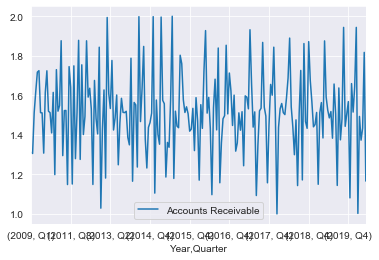

Yeo-Johnson
Inventory


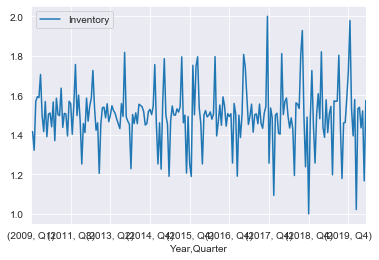

box_cox
0.05946066249977417
Total current assets


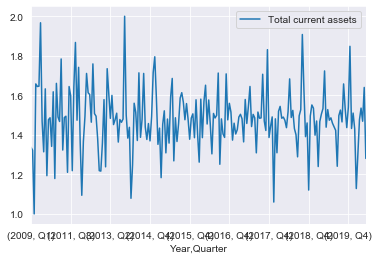

box_cox
0.03634072369432741
Total current liabilities


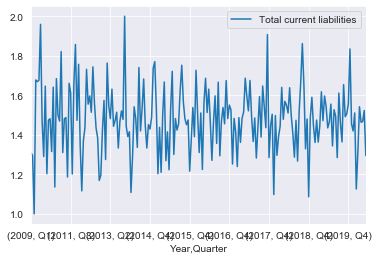

box_cox
0.029075013355024076
Total liabilities


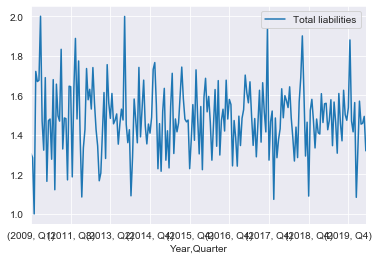

Yeo-Johnson
Common Stock


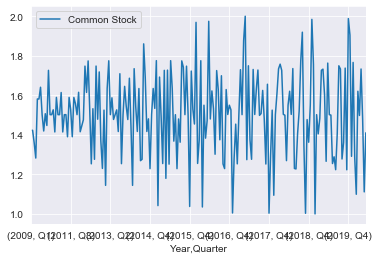

box_cox
0.07463460811084012
New Deferred Revenue


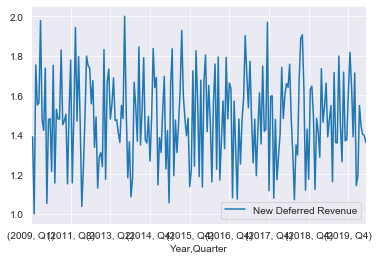

box_cox
0.27354440193959356
New Property and Equipment


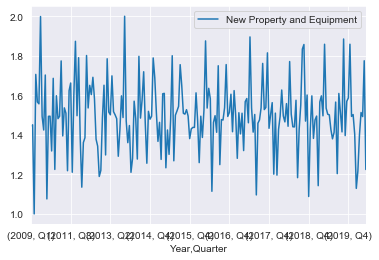

box_cox
0.08087706738585398
Total Non-Current Assets


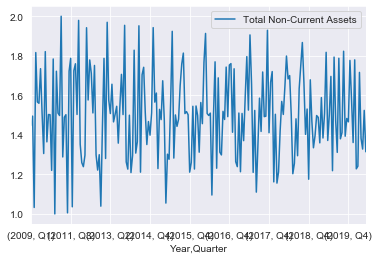

box_cox
0.05620906987840381
Total_Assets


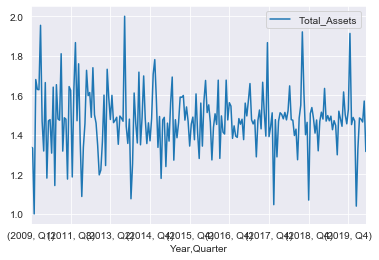

box_cox
0.22701907631463522
Non-Current Liabilities


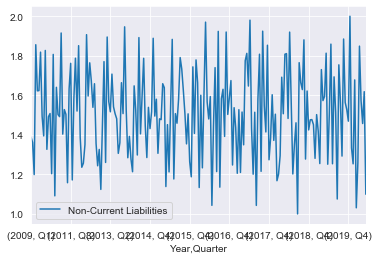

box_cox
0.08220754061353464
Total Shareholder's Equity


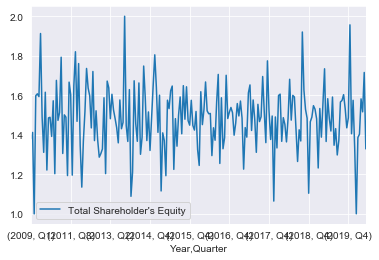

box_cox
0.14684847837590842
Accounts Payables


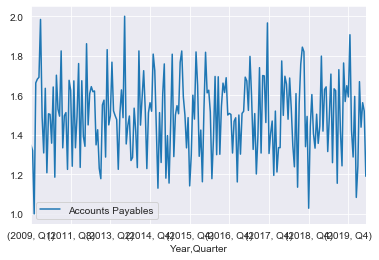

box_cox
0.016344786249034085
Retained Earning


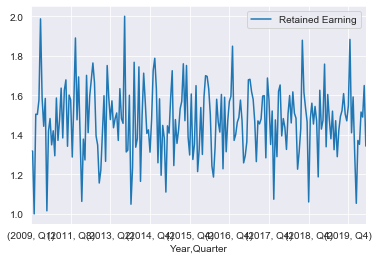

box_cox
0.17193996654365631
OCI


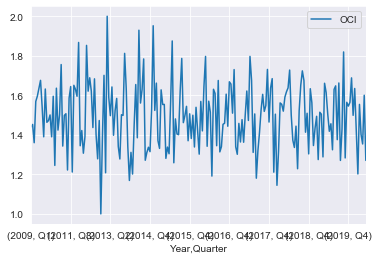

Yeo-Johnson
Short_term_investments


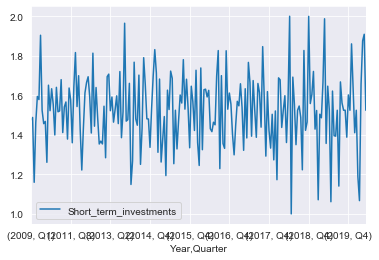

box_cox
-1.1069733999164013
current_ratio


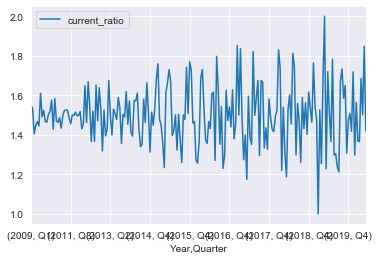

Yeo-Johnson
quick_ratio


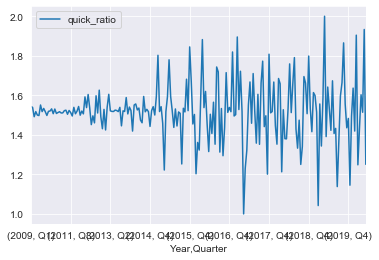

box_cox
1.9752372800342073
debt_ratio


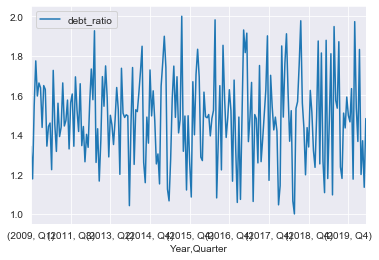

box_cox
0.4654828522428406
debt_to_equity_ratio


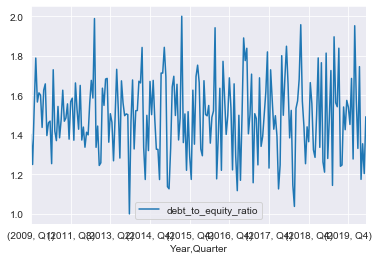

box_cox
0.4309327444331425
equity_multiplier


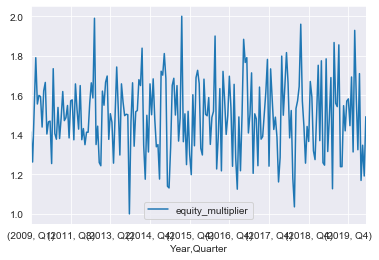

In [52]:
df = X_train
# Create dictionary to save the transformation parameters.
trans_para_ = {}

transformed_df_list = []

# Apply to all training columns. 
for col_name in df.columns:
        
    # Apply only to numeric columns. 
    if df[col_name].dtypes == 'float64':
            
        s = df[col_name]
        
        # Brown's Transformation Suggestions
        result = brown_transform(col_name, s, 4)
        
        transformed_df = pd.DataFrame({col_name:result}, index=df.index[4:] )
        
        transformed_df.plot(kind='line')
        transformed_df_list.append(transformed_df)
        
        print(col_name)
        plt.show()
        

In [53]:
new_X_train = pd.concat(transformed_df_list, axis=1)

### Implement the training transformations onto X_test with trans_para_.

In [54]:
# X_test_new = scaler.transform(X_test)
X_test_new_list = []
for col, parameters in trans_para_.items():
    
    power_T = parameters[0][0]
    
    lmbda = parameters[0][1]
    
    mean_ = parameters[1]
    
    std_ = parameters[2]
    
    s = X_test[col]
#     s.plot(title=col)
#     plt.show()
    
    # Power Transformation
    if power_T == 'B-C':
        result = boxcox(s, lmbda)
        
    elif power_T == 'Y-J':
        result = yeojohnson(s, lmbda)
    
    # Difference Transformation
    diff_res = difference(result, 4)
    
    # StandardScaler 
    diff_res = array(diff_res).reshape(len(diff_res), 1)
    standard_res = StandardScaler(with_mean = mean_, 
                                 with_std = std_ ).fit_transform(diff_res)
    
    # Normalization
    norm_res = MinMaxScaler(feature_range=(1,2)).fit_transform(standard_res)
    norm_res = [ s[0] for s in norm_res]
    
    df = pd.DataFrame(dict({col: norm_res}), index=s.index[4:])
    X_test_new_list.append(df)
    
#     X_test_new.plot(title=col)
#     plt.show()
    

In [55]:
new_X_Test = pd.concat(X_test_new_list, axis=1)
new_X_Test.head()

Accounts Receivable  Inventory  Total current assets  \
Year Quarter                                                         
2009 Q2                  1.523746   1.496204              1.513926   
2010 Q4                  1.266977   1.634404              1.899289   
2011 Q3                  1.549089   1.511636              1.554012   
2012 Q2                  1.508746   1.656910              1.607268   
     Q3                  1.266768   1.487687              1.421457   

              Total current liabilities  Total liabilities  Common Stock  \
Year Quarter                                                               
2009 Q2                        1.510675           1.495287      1.496665   
2010 Q4                        1.796102           1.814590      1.544673   
2011 Q3                        1.552951           1.550655      1.500542   
2012 Q2                        1.599878           1.624281      1.495277   
     Q3                        1.440493           1.467014      1.431104   

              New Deferred Revenue  New Property and Equipment  \
Year Quarter                                                     
2009 Q2                   1.493422                    1.494713   
2010 Q4                   1.826390                    2.000000   
2011 Q3                   1.473909                    1.560760   
2012 Q2                   1.525505                    1.458983   
     Q3                   1.459607                    1.382202   

              Total Non-Current Assets  Total_Assets  Non-Current Liabilities  \
Year Quarter                                                                    
2009 Q2                       1.589083      1.524589                 1.493380   
2010 Q4                       1.707728      1.907264                 1.913987   
2011 Q3                       1.512014      1.563134                 1.580089   
2012 Q2                       1.395704      1.602019                 1.563935   
     Q3                       1.338398      1.434601                 1.427541   

              Total Shareholder's Equity  Accounts Payables  Retained Earning  \
Year Quarter                                                                    
2009 Q2                         1.628471           1.506001          1.484405   
2010 Q4                         2.000000           1.867868          2.000000   
2011 Q3                         1.567562           1.553316          1.640237   
2012 Q2                         1.523780           1.481429          1.708873   
     Q3                         1.347003           1.337985          1.597958   

                   OCI  Short_term_investments  current_ratio  quick_ratio  \
Year Quarter                                                                 
2009 Q2       1.632924                1.594188       1.525211     1.479349   
2010 Q4       1.733061                1.961786       1.640760     1.492178   
2011 Q3       1.558116                1.662253       1.468963     1.469919   
2012 Q2       1.467395                1.620498       1.486035     1.433224   
     Q3       1.378804                1.536860       1.475057     1.446840   

              debt_ratio  debt_to_equity_ratio  equity_multiplier  
Year Quarter                                                       
2009 Q2         1.168713              1.069865           1.042197  
2010 Q4         1.450827              1.447527           1.457141  
2011 Q3         1.477233              1.477145           1.489894  
2012 Q2         1.801843              1.751837           1.767145  
     Q3         1.719369              1.701185           1.724642

Before transformation - 
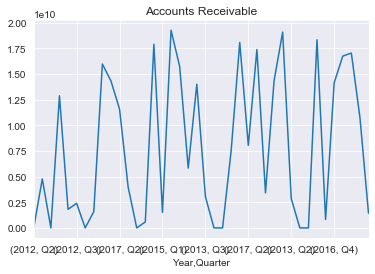

After transformation -
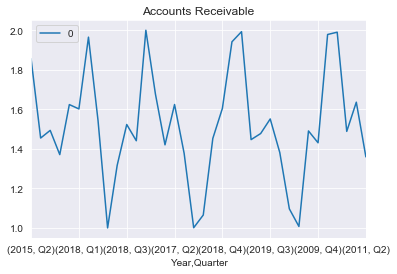

In [56]:
# Pipeline dictionary Classifiers
pipelines = {
    'l1' : make_pipeline(LogisticRegression(penalty='l1', random_state=123)),
    'l2' : make_pipeline(LogisticRegression(penalty='l2', random_state=123)),
    'rf' : make_pipeline(RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(GradientBoostingClassifier(random_state=123))
}

In [57]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [58]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

## Fit and Tune Model with Cross-Validation

In [59]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(new_X_train, y_train[4:])
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


l1 has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


l2 has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.
gb has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
for name, model in fitted_models.items():
    pred = model.predict_proba(new_X_Test)
    pred = [p[1] for p in pred]
    
    print( name, roc_auc_score(y_test[4:], pred) )

l1 0.376984126984127
l2 0.5595238095238095
rf 0.498015873015873
gb 0.503968253968254


Plot the highest AUROC score.

In [61]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l2'].predict_proba(new_X_Test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
print( np.round(pred[:10], 2) )

[0.65 0.68 0.66 0.67 0.66 0.64 0.68 0.67 0.68 0.67]


In [62]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test[4:], pred)

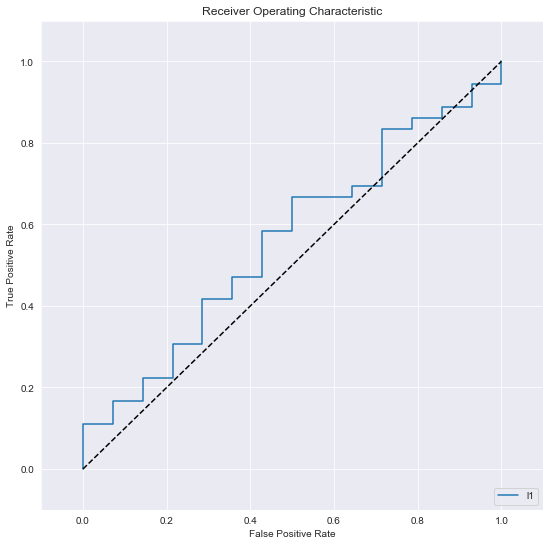

In [63]:
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The above shows the classification where tech is the positive class.

Now reversing the positive class from the Tech industry to Automobile. 


In [64]:
def swapping_targets(y):
    swapped_y_list = []

    for value in y.values:

        if value == 1:
            swapped_y_list.append(0)

        if value == 0:
            swapped_y_list.append(1)
            
    swapped_y = pd.Series(swapped_y_list, index=y.index)
    
    return swapped_y

In [65]:
new_y_train = swapping_targets(y_train)

In [66]:
new_y_test = swapping_targets(y_test)

In [67]:
# Create empty dictionary called fitted_models
fitted_models_2 = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(new_X_train, new_y_train[4:])
    
    # Store model in fitted_models[name] 
    fitted_models_2[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


l1 has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


l2 has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.
gb has been fitted.


C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
for name, model in fitted_models_2.items():
    pred = model.predict_proba(new_X_Test)
    pred = [p[1] for p in pred]
    
    print( name, roc_auc_score(new_y_test[4:], pred) )

l1 0.5
l2 0.5595238095238095
rf 0.498015873015873
gb 0.503968253968254


Swapping 0 and 1 produces the same results except for l1. 

In [69]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models_2['l2'].predict_proba(new_X_Test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
print( np.round(pred[:10], 2) )

[0.35 0.32 0.34 0.33 0.34 0.36 0.32 0.33 0.32 0.33]


In [70]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(new_y_test[4:], pred)

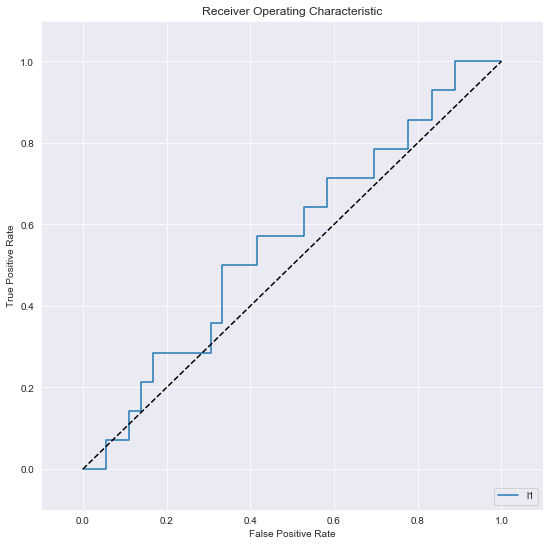

In [71]:
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Expt 1.1 conclusion, classifier is as good as chance.
We will not try classifying Tesla into the models under these preprocessing conditions, because it is as the same as guessing.


<a id='expt1.2'></a>

# Experiment 1.2 - individually transforming within companies across the same time-frame
<a href='#top'>Top of Page</a>

In [28]:
tesla_df_1_2 = main_df_1_2[main_df_1_2['industry'].isna()]
Train_df_1_2 = main_df_1_2[main_df_1_2['industry'].notna()]

In [29]:
# Create separate object for target variable
y = Train_df_1_2.industry

# Create separate object for input features
X = Train_df_1_2.drop('industry', axis=1)

In [31]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=Train_df.industry)

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

216 54 216 54


In [32]:
X_test.sort_index(ascending=True, sort_remaining= True, inplace=True)
X_train.sort_index(ascending=True, sort_remaining= True, inplace=True)

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
company_list = [name for name in X_train.company_name.unique()]

In [37]:
df_lst = []
for name in company_list:
    company_df = X_train[X_train['company_name']==name]
    df_lst.append(company_df)

In [38]:
company_dfs = dict(zip(company_list, df_lst))

In [53]:
for name, df in company_dfs.items():
    print(name)
    partial_df = df.head(2)
    print(df.shape)
#     ICD.display(partial_df)

Amazon
(39, 27)
Netflix
(39, 27)
GM
(35, 27)
Microsoft
(28, 27)
Ford
(23, 27)
Apple
(20, 27)
Facebook
(16, 27)
Google
(16, 27)


 **Perform columnar transformation on each company-dataframe.**

Amazon
(39, 27)
box_cox
0.06418439423145757
Accounts Receivable


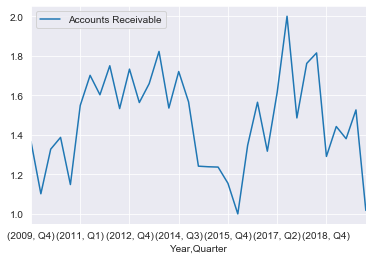

box_cox
0.27632637664316917
Inventory


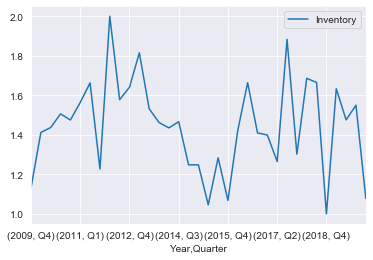

box_cox
0.04035760234331951
Total current assets


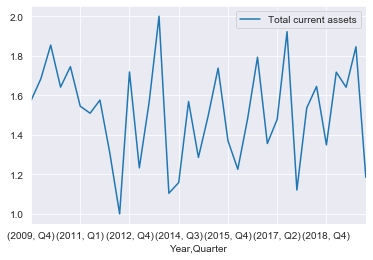

box_cox
0.11220637837881604
Total current liabilities


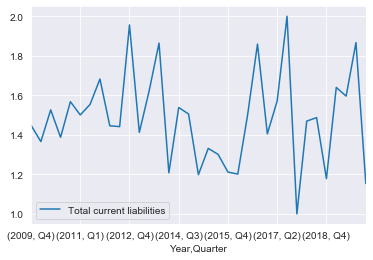

box_cox
0.04045731676988857
Total liabilities


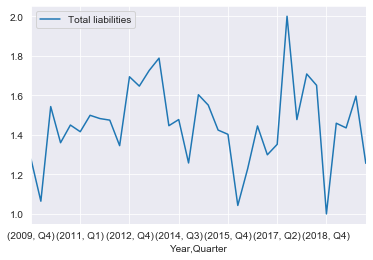

box_cox
23.16400230402735
Common Stock


C:\Users\Matthew\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Matthew\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


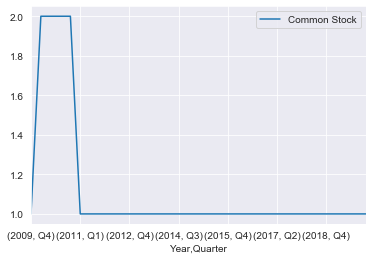

box_cox
-0.020362201476150043
New Deferred Revenue


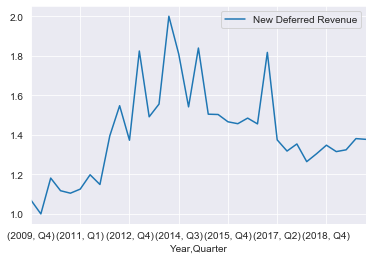

box_cox
0.13844367125343598
New Property and Equipment


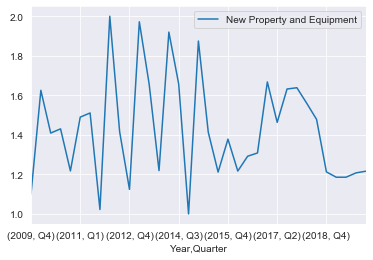

box_cox
-0.11055339202236036
Total Non-Current Assets


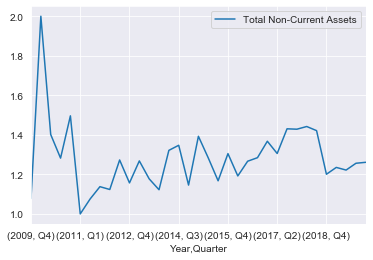

box_cox
0.006612410290704827
Total_Assets


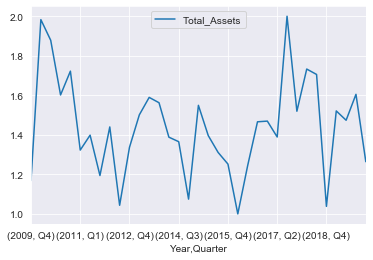

box_cox
0.01414145065993099
Non-Current Liabilities


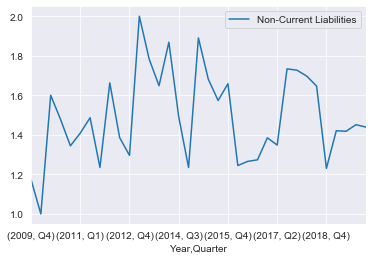

box_cox
-0.004571694734615738
Total Shareholder's Equity


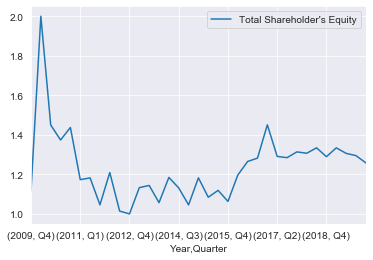

box_cox
0.13728398150638793
Accounts Payables


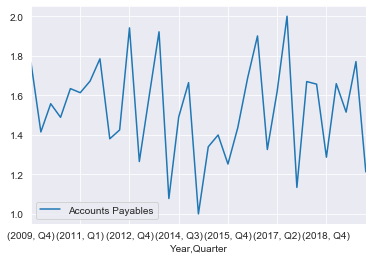

box_cox
-0.06887129753080037
Retained Earning


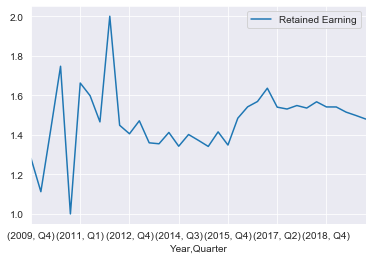

box_cox
0.34147251667427486
OCI


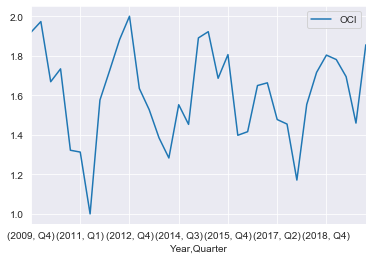

box_cox
0.04477521648269285
Short_term_investments


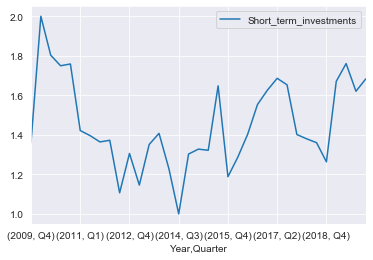

box_cox
-2.3228978654681565
current_ratio


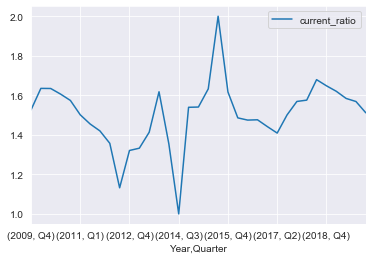

box_cox
-0.29554667465387413
quick_ratio


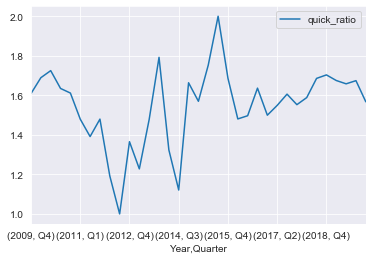

box_cox
4.240791398330185
debt_ratio


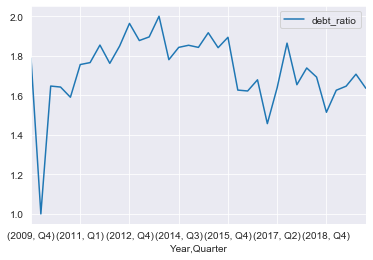

box_cox
0.7423109326029046
debt_to_equity_ratio


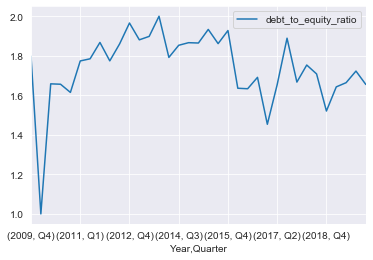

box_cox
0.7025069679843937
equity_multiplier


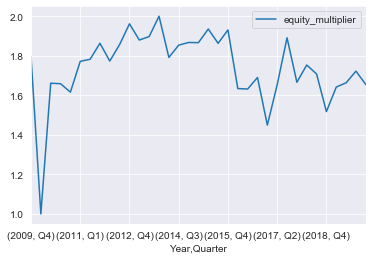

Netflix
(39, 27)
Yeo-Johnson
Accounts Receivable


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1465: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > tmp2 * (a - x)) and (p < tmp2 * (b - x)) and


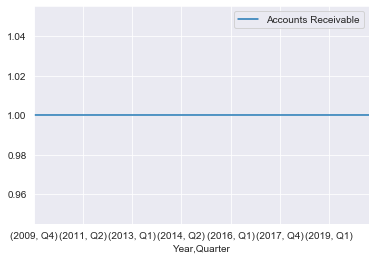

box_cox
-0.06595141061245446
Inventory


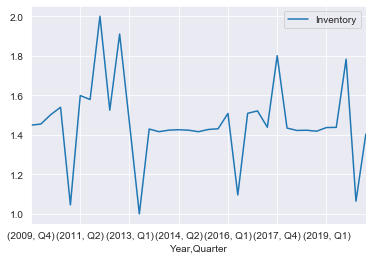

box_cox
-0.1854323482355117
Total current assets


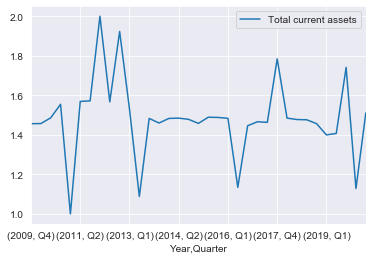

box_cox
-0.17224138339225717
Total current liabilities


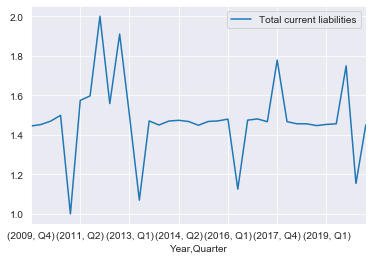

box_cox
-0.13562485951315237
Total liabilities


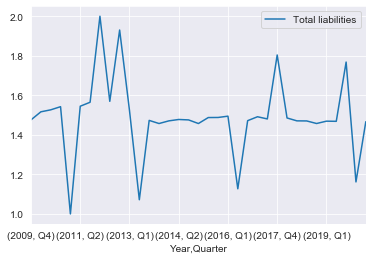

box_cox
-0.039663455295349176
Common Stock


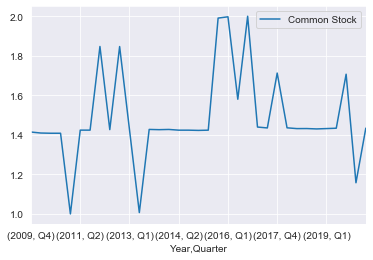

box_cox
-0.3040130584086464
New Deferred Revenue


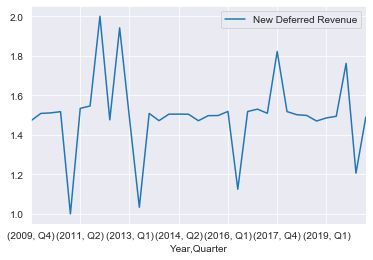

box_cox
-0.4184214831474811
New Property and Equipment


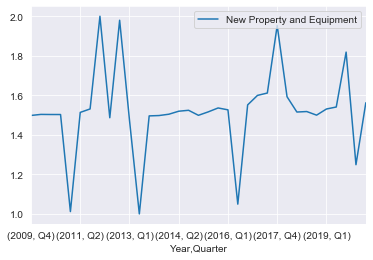

box_cox
-0.12967873424559856
Total Non-Current Assets


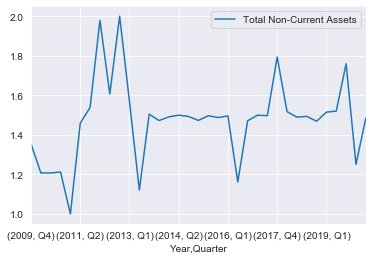

box_cox
-0.1557776269346823
Total_Assets


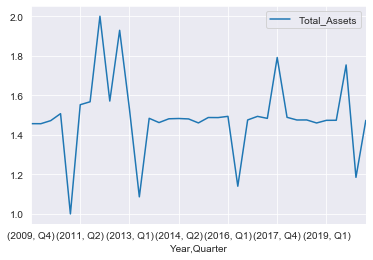

box_cox
-0.23841458048651287
Non-Current Liabilities


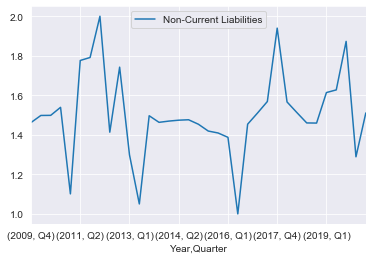

box_cox
-0.18702234849666916
Total Shareholder's Equity


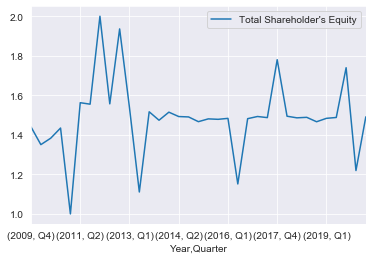

box_cox
-0.3872162809477939
Accounts Payables


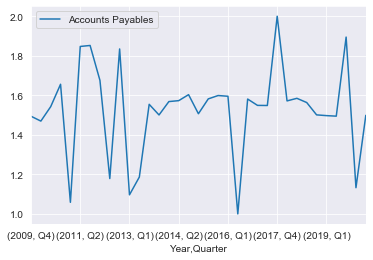

box_cox
-0.2352835670564191
Retained Earning


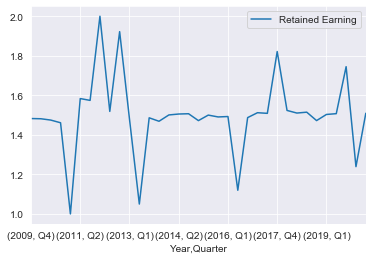

box_cox
-0.12256952260299013
OCI


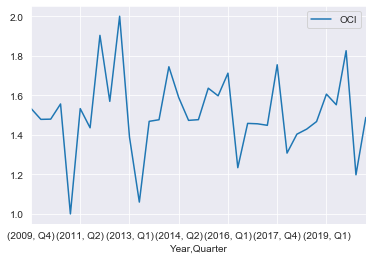

Yeo-Johnson
Short_term_investments


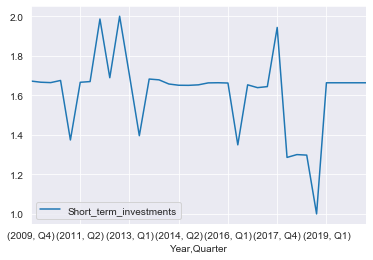

box_cox
2.594534179150716
current_ratio


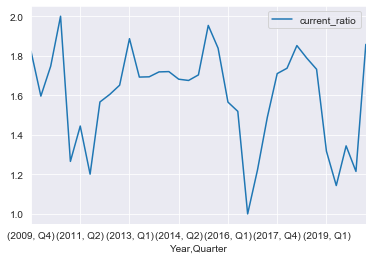

Yeo-Johnson
quick_ratio


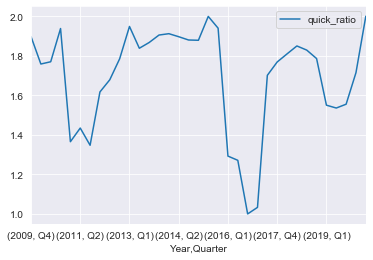

box_cox
9.022836909803464
debt_ratio


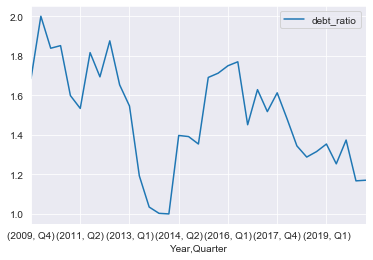

box_cox
2.3338204548593713
debt_to_equity_ratio


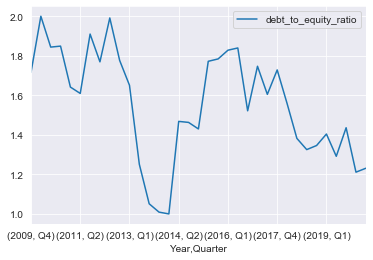

box_cox
3.0846407316554996
equity_multiplier


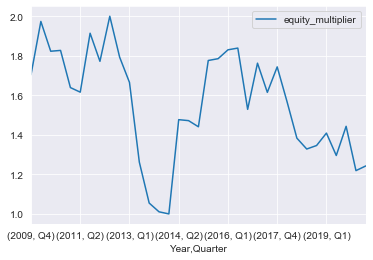

GM
(35, 27)
box_cox
0.7433794505996484
Accounts Receivable


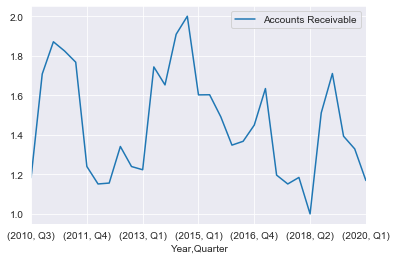

box_cox
2.239309982417602
Inventory


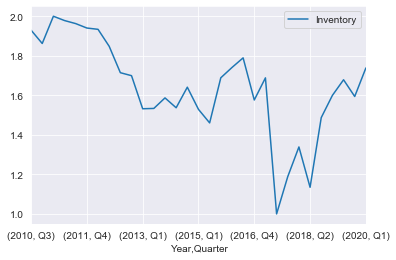

box_cox
0.7596528724837657
Total current assets


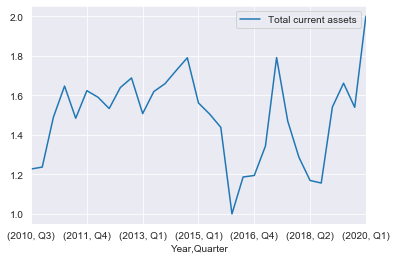

box_cox
-0.5359022789932544
Total current liabilities


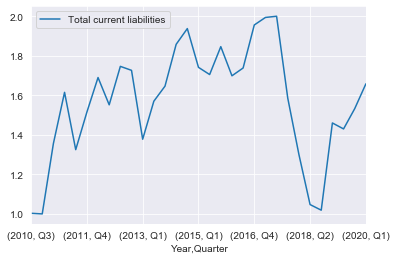

box_cox
-0.44819853607904536
Total liabilities


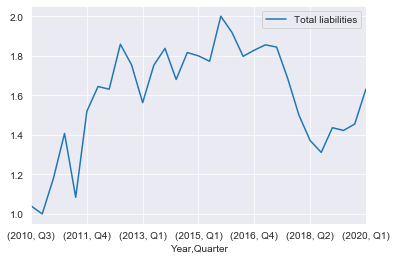

Yeo-Johnson
Common Stock


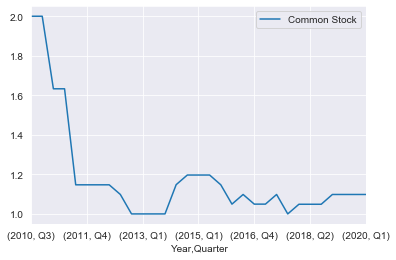

box_cox
-0.3696894548243117
New Deferred Revenue


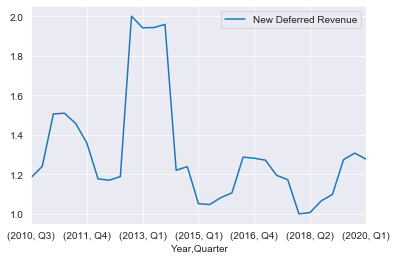

box_cox
-0.34880896619801327
New Property and Equipment


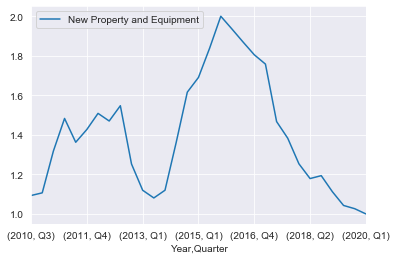

box_cox
-1.1307457881607221
Total Non-Current Assets


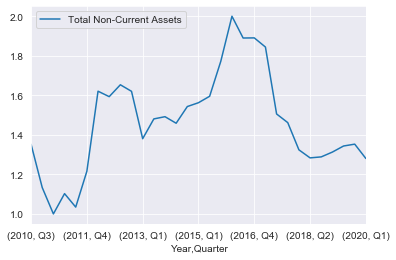

box_cox
-0.7565249624597247
Total_Assets


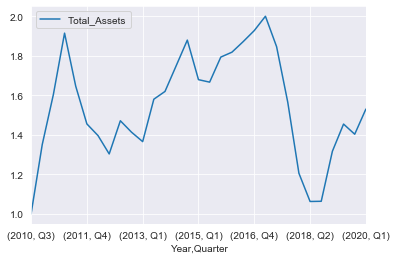

box_cox
-0.24839504414279717
Non-Current Liabilities


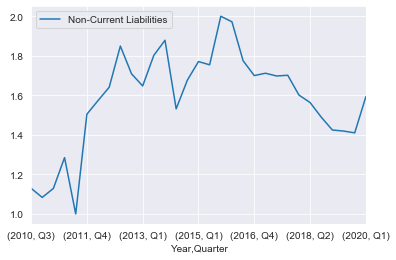

box_cox
3.722477075787693
Total Shareholder's Equity


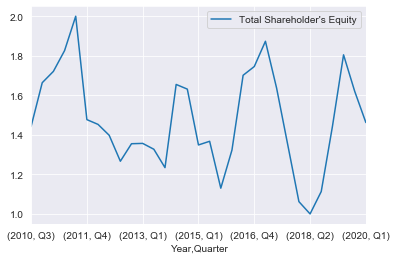

box_cox
2.707089935547507
Accounts Payables


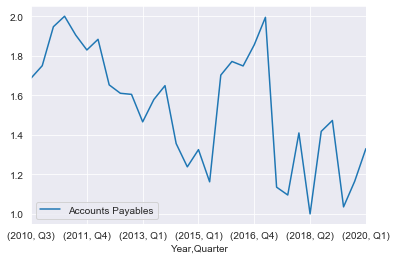

box_cox
0.6354970778760165
Retained Earning


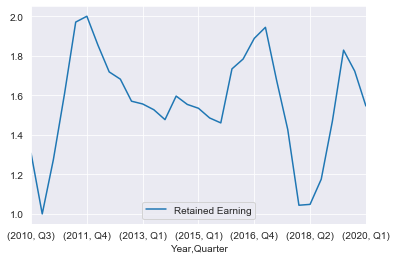

box_cox
0.9747115286791962
OCI


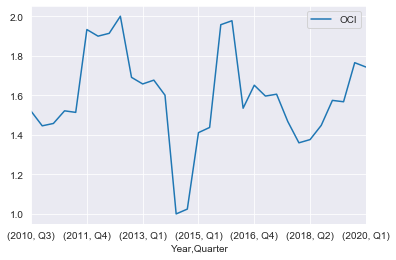

Yeo-Johnson
Short_term_investments


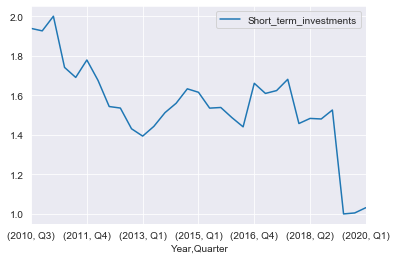

box_cox
2.8712480419499
current_ratio


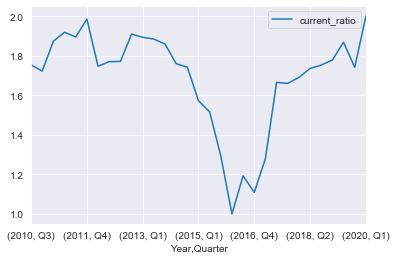

box_cox
2.335058717589108
quick_ratio


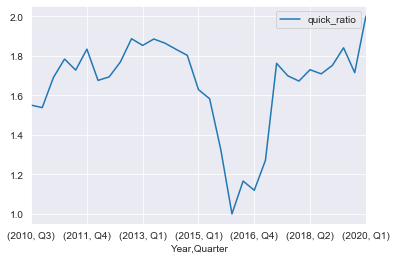

box_cox
5.0946396065354405
debt_ratio


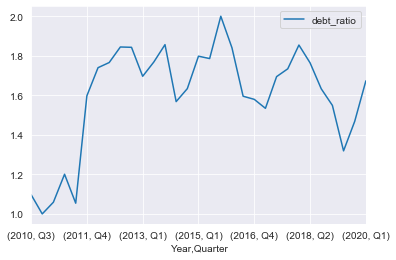

box_cox
0.2373297051229943
debt_to_equity_ratio


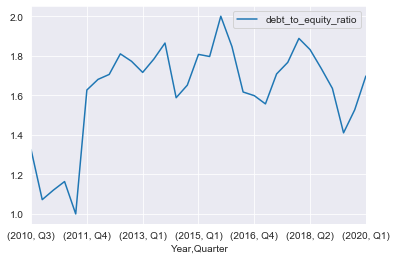

box_cox
-0.09350775331625034
equity_multiplier


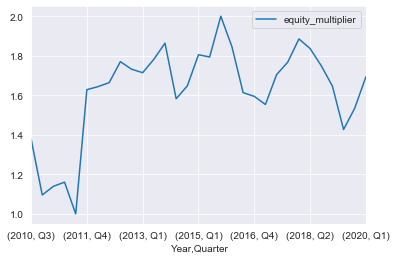

Microsoft
(28, 27)
box_cox
-0.19260472696992104
Accounts Receivable


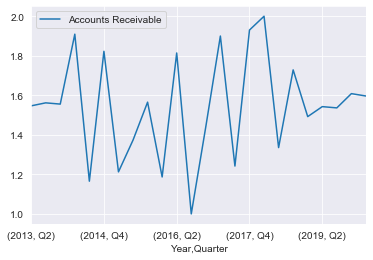

box_cox
0.41770031108808675
Inventory


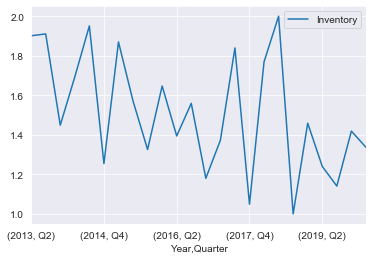

box_cox
1.3614818944555467
Total current assets


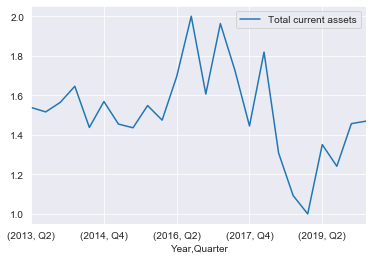

box_cox
0.8429006865349105
Total current liabilities


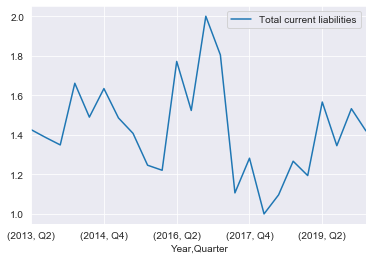

box_cox
0.619018399381164
Total liabilities


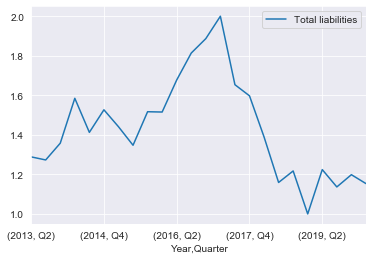

box_cox
-31.48607470954046
Common Stock


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


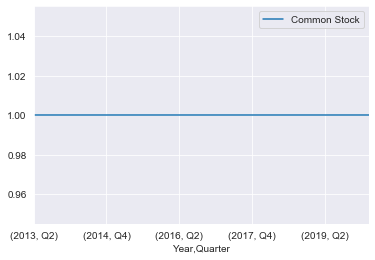

box_cox
-0.6478747088910664
New Deferred Revenue


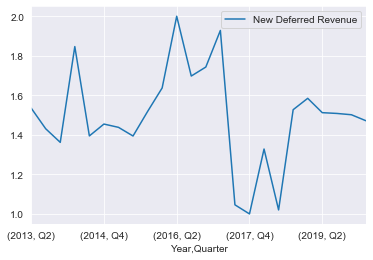

box_cox
-0.04782261140031073
New Property and Equipment


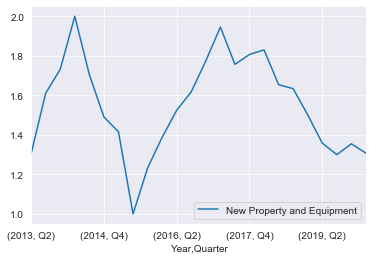

box_cox
0.044648621778224346
Total Non-Current Assets


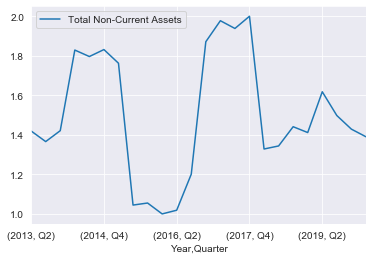

box_cox
0.5339837601014381
Total_Assets


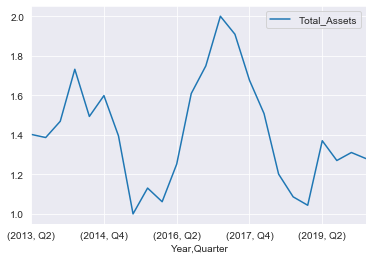

box_cox
0.5346311950380748
Non-Current Liabilities


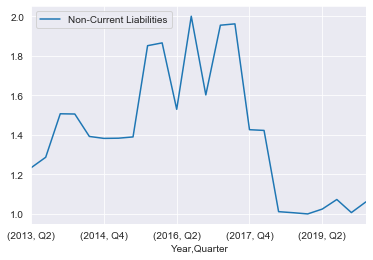

box_cox
-1.449344418849375
Total Shareholder's Equity


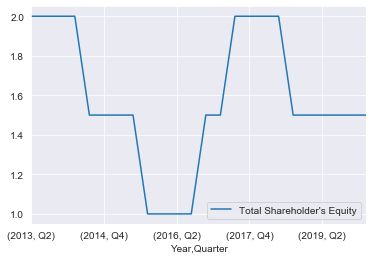

box_cox
1.4703565415597741
Accounts Payables


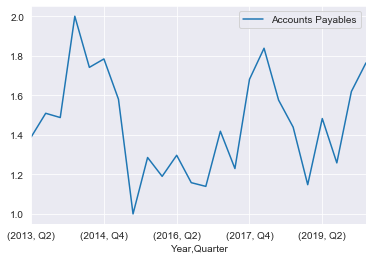

box_cox
0.5322158354041857
Retained Earning


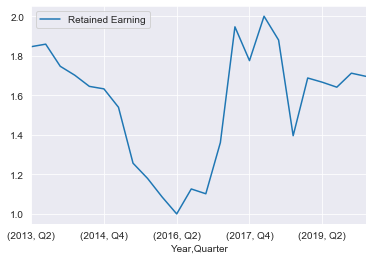

box_cox
0.7204216143882939
OCI


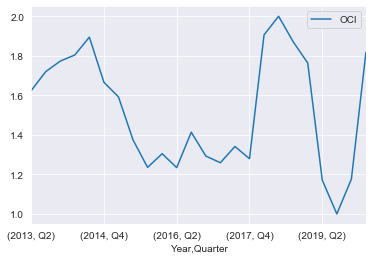

box_cox
1.4733659764122606
Short_term_investments


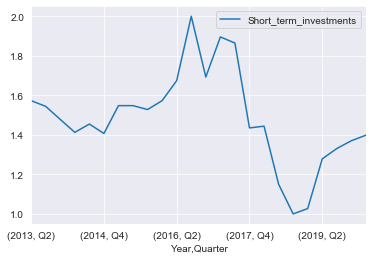

box_cox
3.601717472668583
current_ratio


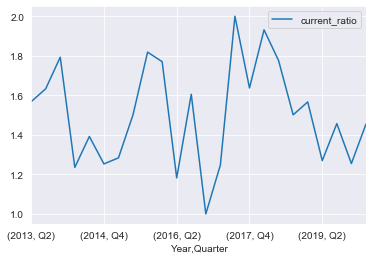

box_cox
3.445663982083434
quick_ratio


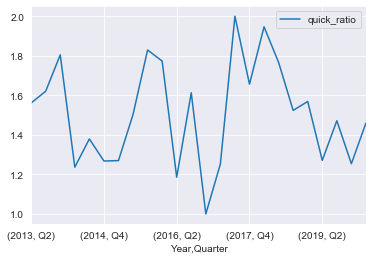

box_cox
1.3468731196651547
debt_ratio


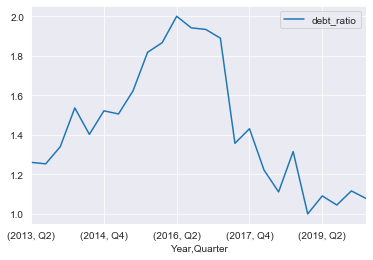

box_cox
0.2736723259354637
debt_to_equity_ratio


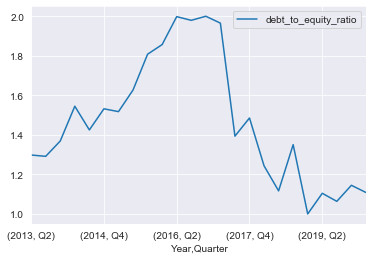

box_cox
0.05702301214998172
equity_multiplier


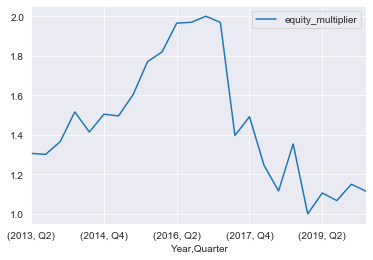

Ford
(23, 27)
box_cox
-0.48408209542415226
Accounts Receivable


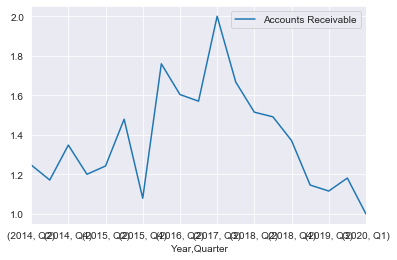

box_cox
1.1804586477004788
Inventory


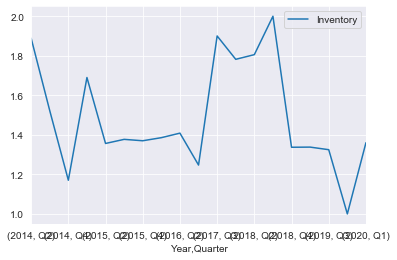

box_cox
2.5742432487748665
Total current assets


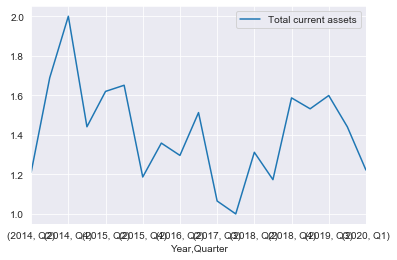

box_cox
3.054515914297421
Total current liabilities


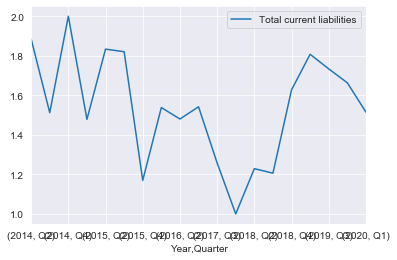

box_cox
1.1086777811816078
Total liabilities


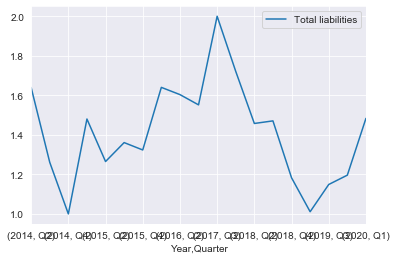

box_cox
20.441454150099197
Common Stock


C:\Users\Matthew\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Matthew\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


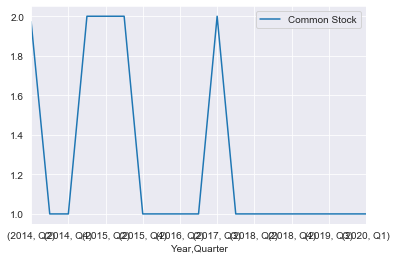

box_cox
3.256161191000711
New Deferred Revenue


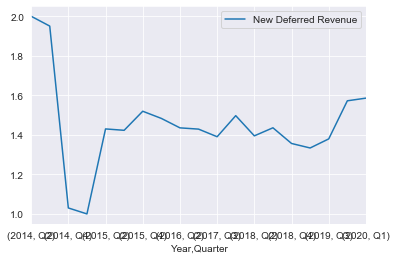

box_cox
2.685536730773458
New Property and Equipment


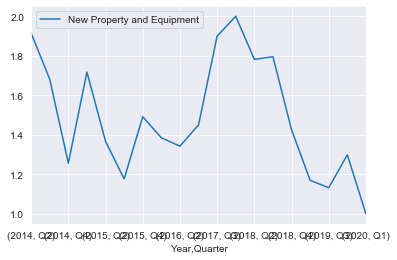

box_cox
3.120274699281646
Total Non-Current Assets


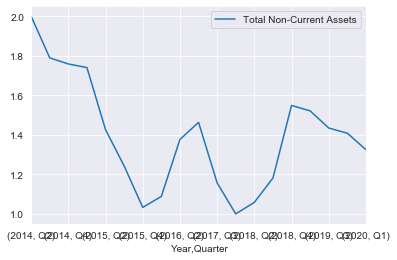

box_cox
1.738202699652891
Total_Assets


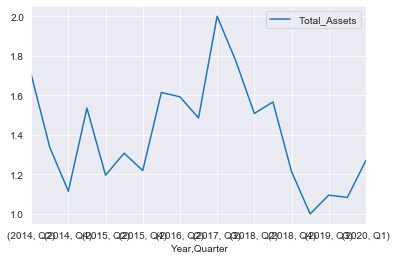

box_cox
-0.9212711582570448
Non-Current Liabilities


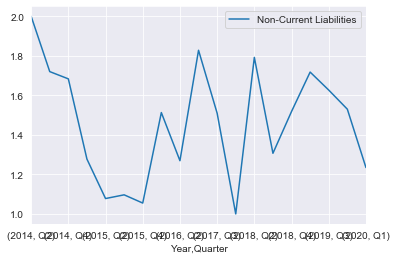

box_cox
1.8307110964881823
Total Shareholder's Equity


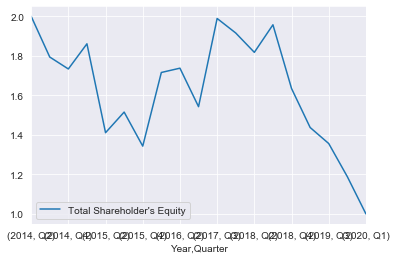

box_cox
2.1114178122824323
Accounts Payables


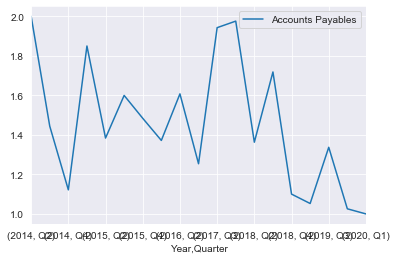

box_cox
2.286878571067894
Retained Earning


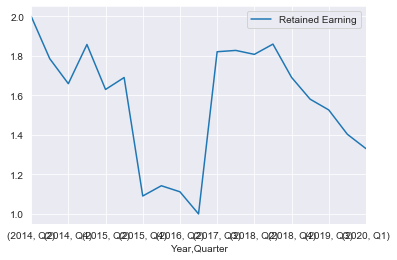

box_cox
-0.4093931852968236
OCI


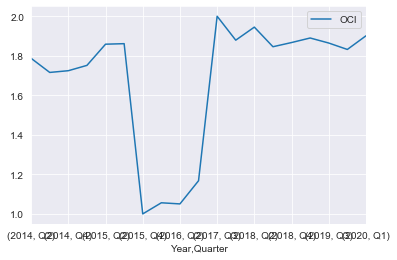

box_cox
0.9676153952239184
Short_term_investments


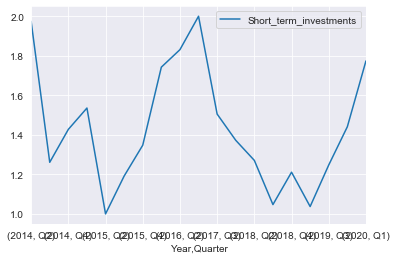

box_cox
-4.0161295182433765
current_ratio


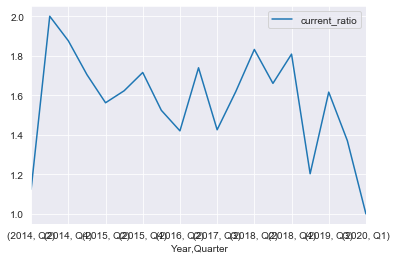

box_cox
-0.7051898821584633
quick_ratio


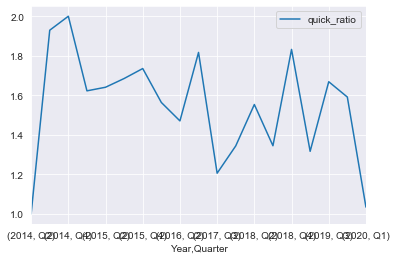

box_cox
-28.397248786753483
debt_ratio


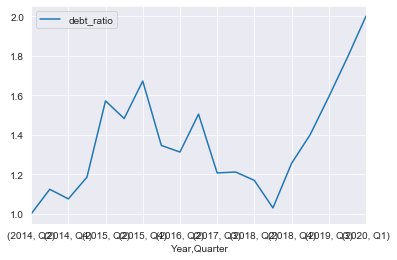

box_cox
-3.9033131177329428
debt_to_equity_ratio


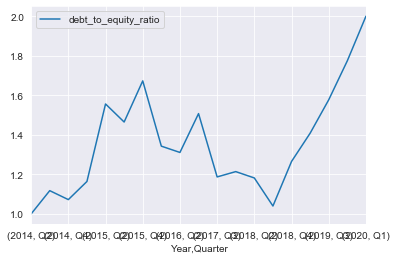

box_cox
-4.501447992062625
equity_multiplier


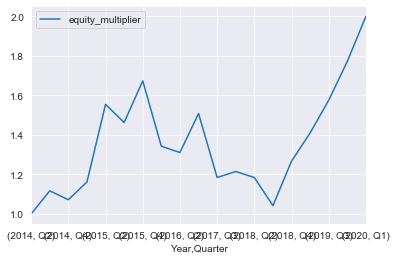

Apple
(20, 27)
box_cox
-0.4265511952649913
Accounts Receivable


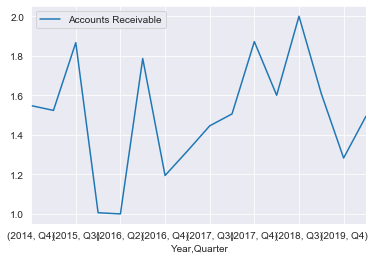

box_cox
-0.6118669107523784
Inventory


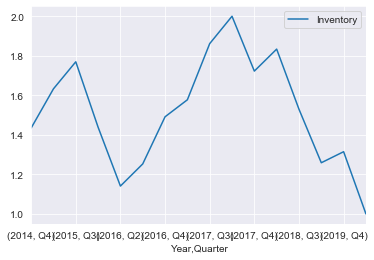

box_cox
-0.196398018124318
Total current assets


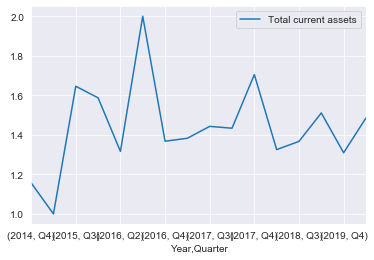

box_cox
0.7627716586557348
Total current liabilities


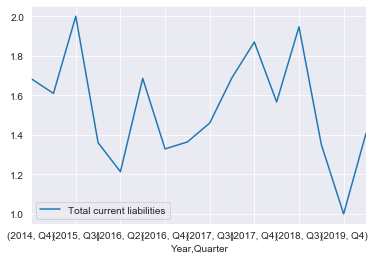

box_cox
1.3587774316700796
Total liabilities


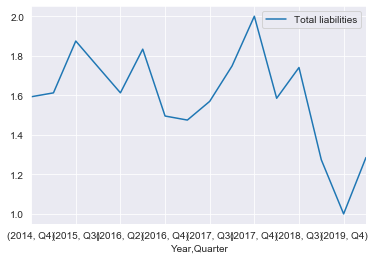

box_cox
0.02232638312384854
Common Stock


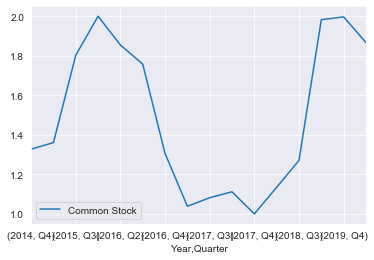

box_cox
4.033226351831569
New Deferred Revenue


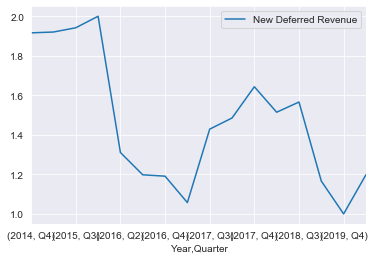

box_cox
0.48378828604432295
New Property and Equipment


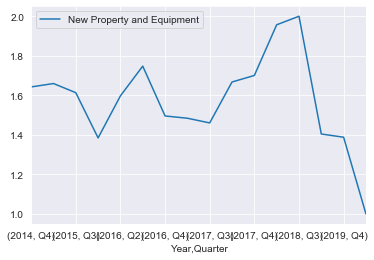

box_cox
-0.14591203246706952
Total Non-Current Assets


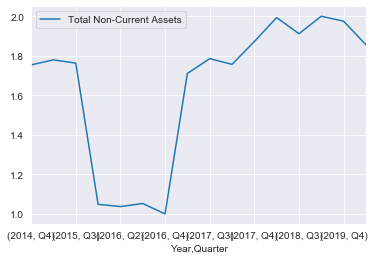

box_cox
1.7310585775975507
Total_Assets


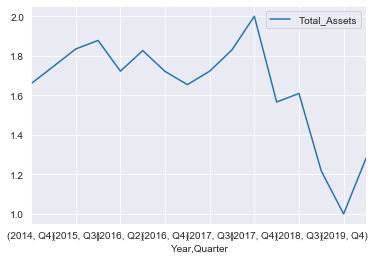

box_cox
0.5326783744385524
Non-Current Liabilities


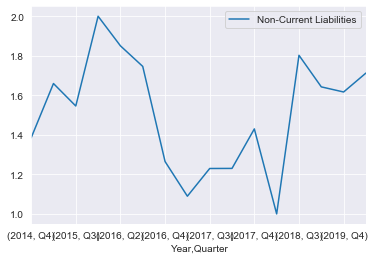

box_cox
4.995463184103234
Total Shareholder's Equity


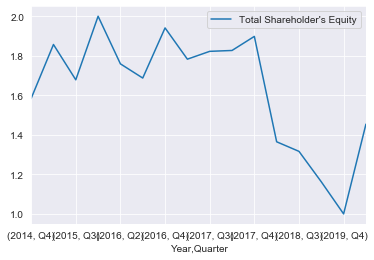

box_cox
-0.059699183902433395
Accounts Payables


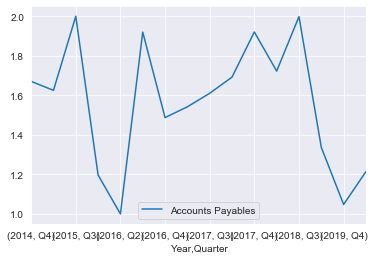

box_cox
3.891789660307098
Retained Earning


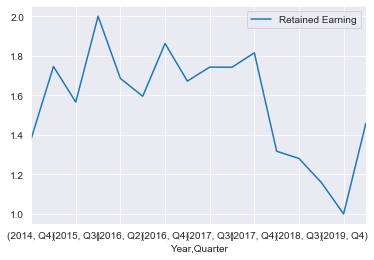

box_cox
-0.016489726971057217
OCI


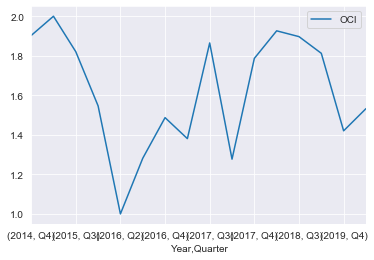

Yeo-Johnson
Short_term_investments


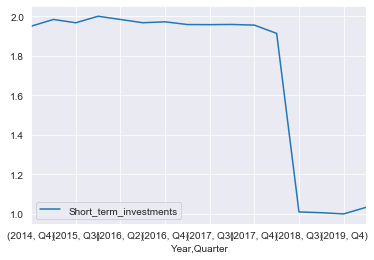

box_cox
-0.14290241447301413
current_ratio


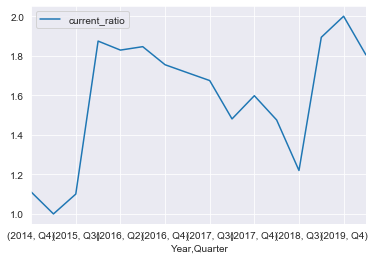

box_cox
-0.24177360753576568
quick_ratio


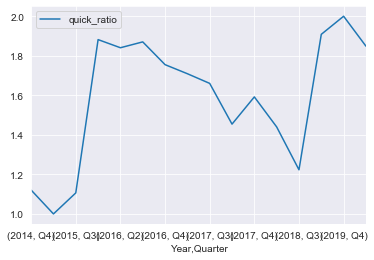

box_cox
1.4095525517599927
debt_ratio


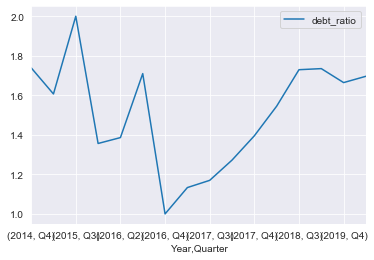

box_cox
0.05729907101121301
debt_to_equity_ratio


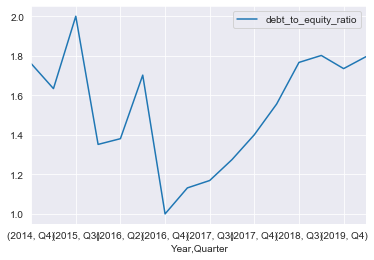

box_cox
-0.4973361514884929
equity_multiplier


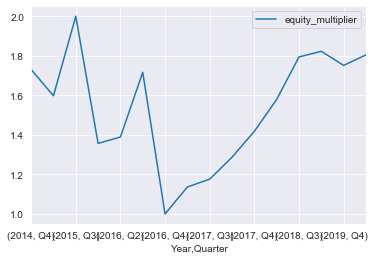

Facebook
(16, 27)
box_cox
0.4369618800584864
Accounts Receivable


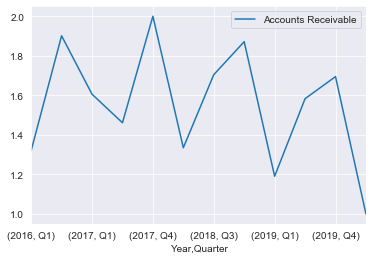

Yeo-Johnson
Inventory


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1465: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > tmp2 * (a - x)) and (p < tmp2 * (b - x)) and


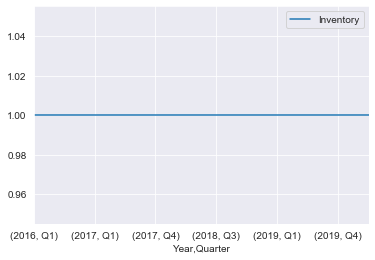

box_cox
0.8191152344246603
Total current assets


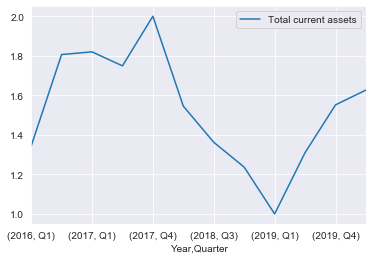

box_cox
-0.30753871199618177
Total current liabilities


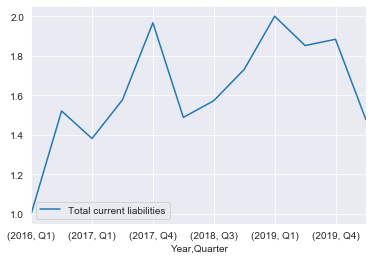

box_cox
-0.5063590964326249
Total liabilities


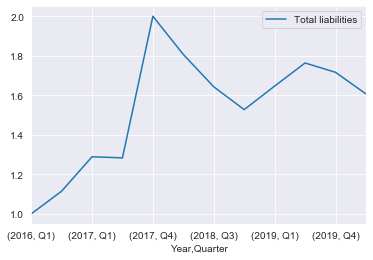

Yeo-Johnson
Common Stock


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1465: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > tmp2 * (a - x)) and (p < tmp2 * (b - x)) and


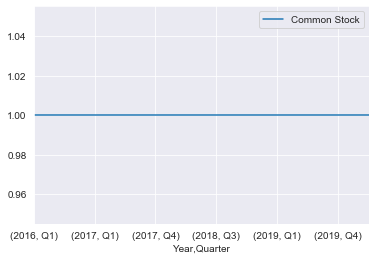

box_cox
-0.5272704048275202
New Deferred Revenue


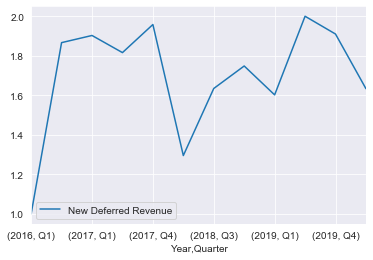

box_cox
0.009811920486187353
New Property and Equipment


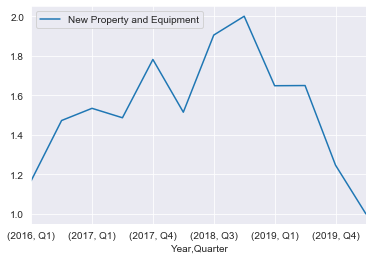

box_cox
1.2478671150674447
Total Non-Current Assets


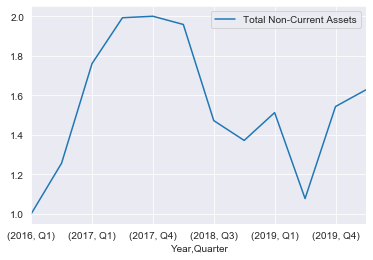

box_cox
0.16683396890658364
Total_Assets


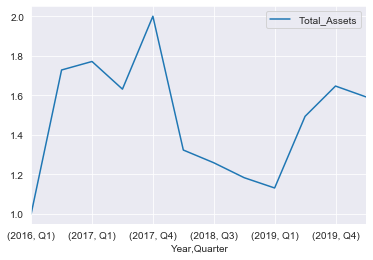

box_cox
0.03503003165061518
Non-Current Liabilities


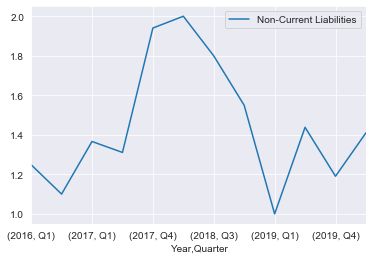

box_cox
0.8415301187152389
Total Shareholder's Equity


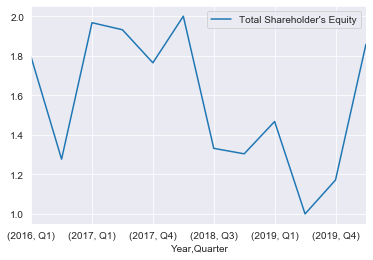

box_cox
-0.08018709922017218
Accounts Payables


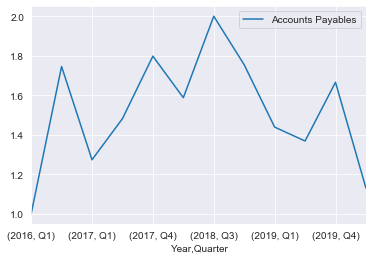

box_cox
0.5670790598932873
Retained Earning


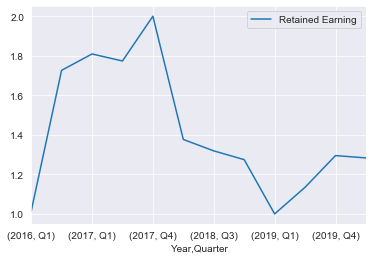

box_cox
0.3893583481501708
OCI


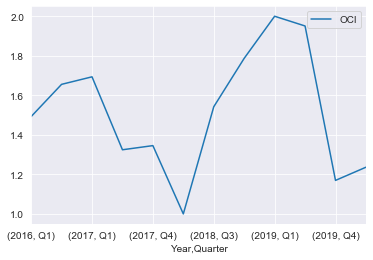

box_cox
1.3306136939795945
Short_term_investments


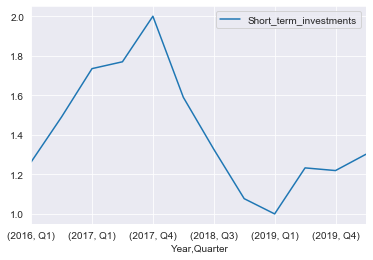

box_cox
1.2292467663080595
current_ratio


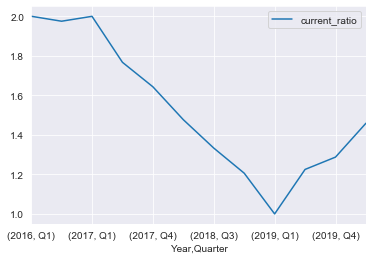

box_cox
1.2292467663080595
quick_ratio


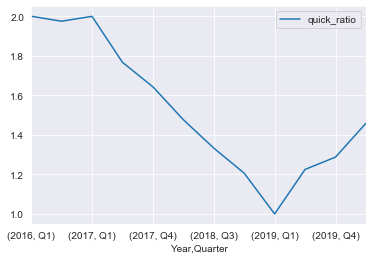

box_cox
-1.856038332560965
debt_ratio


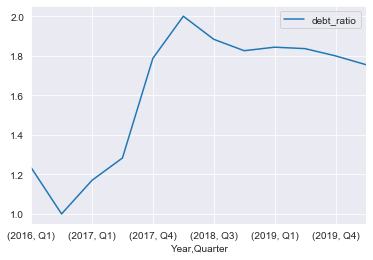

box_cox
-1.5295450721999764
debt_to_equity_ratio


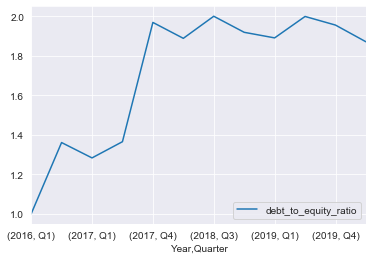

box_cox
-5.804026606879023
equity_multiplier


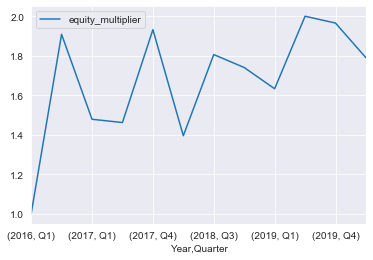

Google
(16, 27)
box_cox
0.8906477760355475
Accounts Receivable


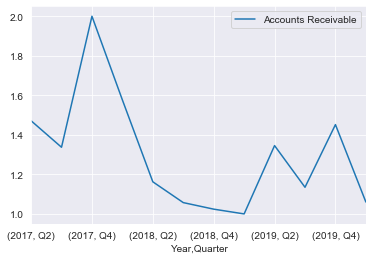

Yeo-Johnson
Inventory


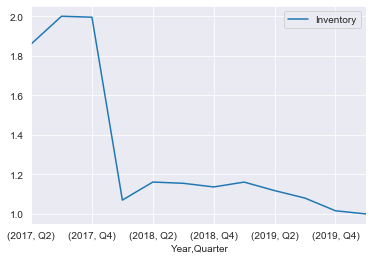

box_cox
1.942997063272351
Total current assets


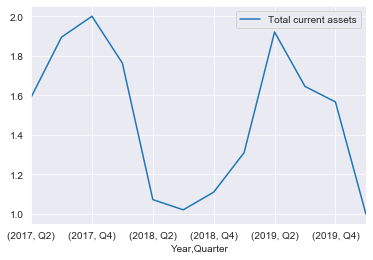

box_cox
0.3033102862622851
Total current liabilities


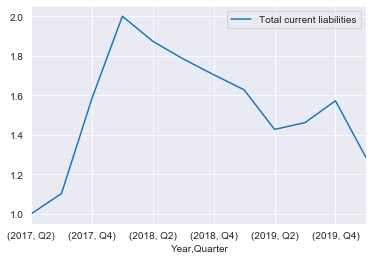

box_cox
0.5265398563597107
Total liabilities


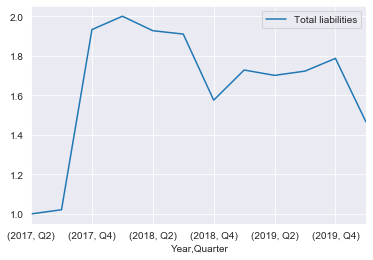

box_cox
0.5884045533477794
Common Stock


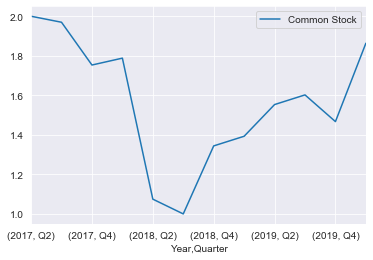

box_cox
2.3244179296312346
New Deferred Revenue


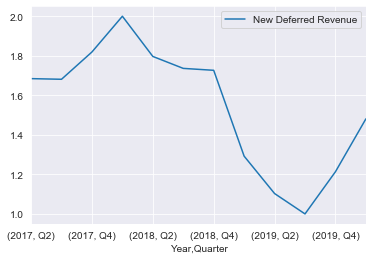

box_cox
0.38000824147290646
New Property and Equipment


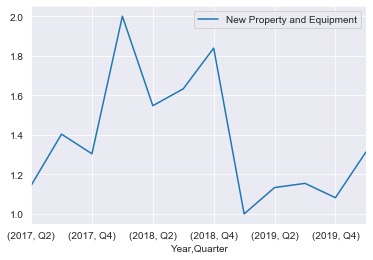

box_cox
-0.21577867051126323
Total Non-Current Assets


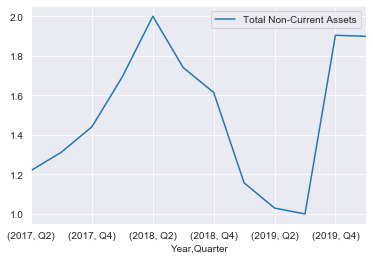

box_cox
0.7332119567946368
Total_Assets


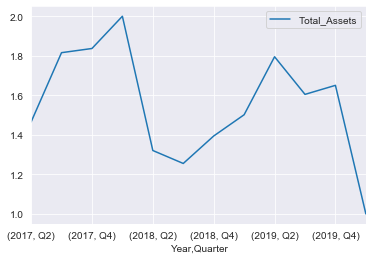

box_cox
2.920882357838193
Non-Current Liabilities


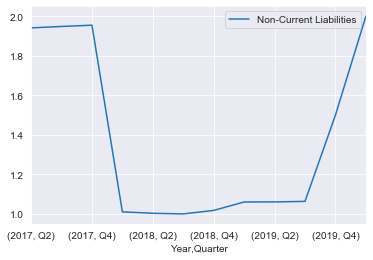

box_cox
1.2385701700766976
Total Shareholder's Equity


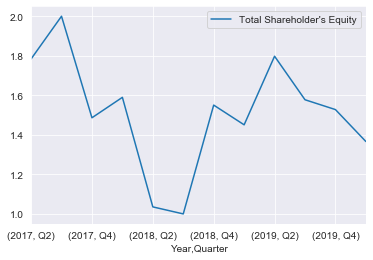

box_cox
0.6942894411127642
Accounts Payables


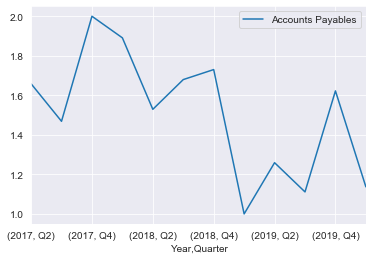

box_cox
1.3553731412544994
Retained Earning


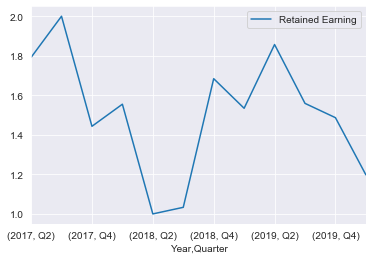

box_cox
0.32604254960391743
OCI


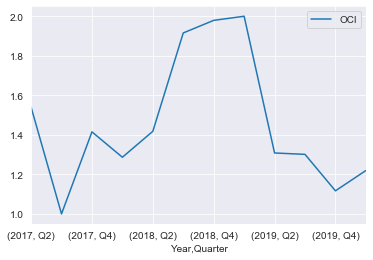

box_cox
3.217122067554487
Short_term_investments


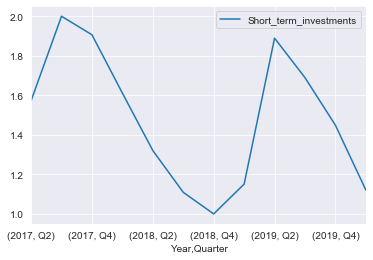

box_cox
-1.2433729386115981
current_ratio


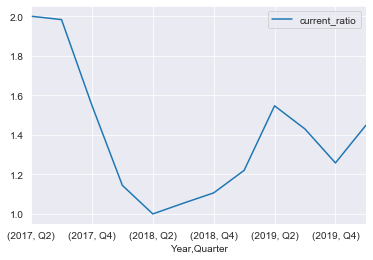

box_cox
-1.2125087979402558
quick_ratio


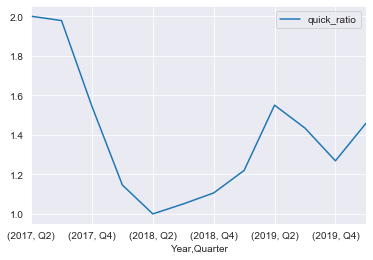

box_cox
4.110242721760493
debt_ratio


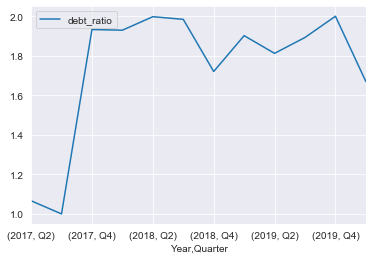

box_cox
3.0194366855565904
debt_to_equity_ratio


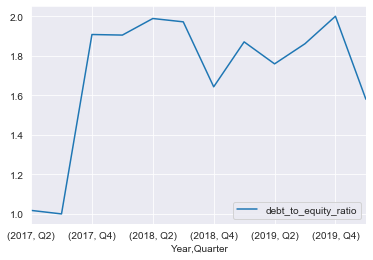

box_cox
4.472210914189118
equity_multiplier


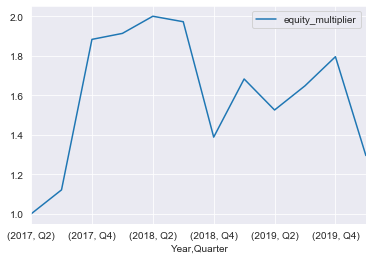

In [54]:
# { Company Name : {feat_name : [parameters]} }
company_trans_para = {}

trfm_com_df_lst = []

# For each company
for name, df in company_dfs.items():
    
    # Create dictionary to save the transformation parameters.
    trans_para_ = {}

    transformed_df_list = []

    # Apply to all training columns within that company.
    for col_name in df.columns:

        # Apply only to numeric columns. 
        if df[col_name].dtypes == 'float64':

            s = df[col_name]

            # Brown's Transformation Suggestions
            result = brown_transform(col_name, s, 4)
            
            # Transformed Series 
            transformed_df = pd.DataFrame({col_name:result}, index=df.index[4:] )
            transformed_df_list.append(transformed_df)
#             transformed_df.plot(kind='line')
#             print(col_name)
#             plt.show()
            
    # Transformed Dataframe, gluing series tgt
    trans_df = pd.concat(transformed_df_list, axis=1)
    
    # Append transformed df to df_list
    trfm_com_df_lst.append(trans_df)
    
    # Saving transformation parameters. 
    company_trans_para[name] = trans_para_
    
#     if name == 'GM':
#         break

#### new_X_train

In [55]:
new_X_train = pd.concat(trfm_com_df_lst, axis=0)
print(new_X_train.shape)
new_X_train.head()

(184, 21)


Accounts Receivable  Inventory  Total current assets  \
Year Quarter                                                         
2009 Q4                  1.365976   1.131664              1.573290   
2010 Q1                  1.101887   1.412032              1.683592   
     Q2                  1.327533   1.437120              1.854031   
     Q3                  1.387110   1.506044              1.641435   
     Q4                  1.148537   1.475006              1.744966   

              Total current liabilities  Total liabilities  Common Stock  \
Year Quarter                                                               
2009 Q4                        1.448900           1.277040           1.0   
2010 Q1                        1.365828           1.064335           2.0   
     Q2                        1.526437           1.543036           2.0   
     Q3                        1.387469           1.360124           2.0   
     Q4                        1.568039           1.449565           2.0   

              New Deferred Revenue  New Property and Equipment  \
Year Quarter                                                     
2009 Q4                   1.069447                    1.100868   
2010 Q1                   1.000000                    1.625162   
     Q2                   1.181308                    1.409127   
     Q3                   1.117376                    1.430249   
     Q4                   1.104859                    1.217379   

              Total Non-Current Assets  Total_Assets  Non-Current Liabilities  \
Year Quarter                                                                    
2009 Q4                       1.078105      1.168913                 1.174251   
2010 Q1                       2.000000      1.982927                 1.000000   
     Q2                       1.401694      1.878493                 1.600361   
     Q3                       1.282257      1.601755                 1.478075   
     Q4                       1.496132      1.722263                 1.344340   

              Total Shareholder's Equity  Accounts Payables  Retained Earning  \
Year Quarter                                                                    
2009 Q4                         1.117569           1.765098          1.281057   
2010 Q1                         2.000000           1.414677          1.112412   
     Q2                         1.450031           1.557437          1.425981   
     Q3                         1.373888           1.488640          1.747010   
     Q4                         1.437323           1.633927          1.000000   

                   OCI  Short_term_investments  current_ratio  quick_ratio  \
Year Quarter                                                                 
2009 Q4       1.919173                1.361568       1.525985     1.608885   
2010 Q1       1.973043                2.000000       1.635066     1.689139   
     Q2       1.668732                1.803065       1.634521     1.724814   
     Q3       1.733904                1.749433       1.606155     1.634635   
     Q4       1.322108                1.758529       1.573967     1.611421   

              debt_ratio  debt_to_equity_ratio  equity_multiplier  
Year Quarter                                                       
2009 Q4         1.788393              1.798259           1.797586  
2010 Q1         1.000000              1.000000           1.000000  
     Q2         1.646823              1.658069           1.661110  
     Q3         1.641794              1.656056           1.658660  
     Q4         1.590252              1.614686           1.616025

### Implement the training transformations onto X_test with trans_para_.


In [67]:
test_company_dfs['Amazon']

Index(['Accounts Receivable', 'Inventory', 'Total current assets',
       'Total current liabilities', 'Total liabilities', 'Common Stock',
       'Total liabilities and equity', 'company_name', 'New Deferred Revenue',
       'New Property and Equipment', 'Total Non-Current Assets',
       'Total_Assets', 'Non-Current Liabilities', 'Total Shareholder's Equity',
       'Accounts Payables', 'Retained Earning', 'OCI',
       'Accounts_Receivable_missing', 'Common_Stock_missing',
       'Short_term_investments', 'Short_term_investments_missing',
       'Inventory_missing', 'current_ratio', 'quick_ratio', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_multiplier'],
      dtype='object')

In [58]:
test_df_lst = []
for name in company_list:
    company_df = X_test[X_test['company_name']==name]
    test_df_lst.append(company_df)

In [59]:
test_company_dfs = dict(zip(company_list, test_df_lst))

In [82]:
for num in abs(np.array([0, 1,2,3,-1,-3])):
    if num == 0:
        print('wow')

wow


In [107]:
test_company_dfs['Amazon']['Accounts Receivable']

Year  Quarter
2007  Q4         3.990000e+08
2008  Q1         5.810000e+08
      Q3         5.970000e+08
2009  Q2         5.840000e+08
2011  Q3         1.496000e+09
2012  Q3         2.392000e+09
2013  Q2         2.861000e+09
2014  Q2         4.125000e+09
2016  Q2         6.092000e+09
2017  Q3         1.055700e+10
2019  Q1         1.597900e+10
Name: Accounts Receivable, dtype: float64

In [106]:
# Too little data!!!! 
test_company_dfs['Microsoft']['Accounts Receivable']

Year  Quarter
2014  Q1         1.349700e+10
2015  Q3         1.144400e+10
2017  Q1         1.288200e+10
2018  Q1         1.720800e+10
Name: Accounts Receivable, dtype: float64

In [105]:
# X_test_new = scaler.transform(X_test)
X_test_new_list = []

for company, trans_para_ in company_trans_para.items():
    
    transformed_df_list = []
    
    for col, parameters in trans_para_.items():

        power_T = parameters[0][0]

        lmbda = parameters[0][1]

        mean_ = parameters[1]

        std_ = parameters[2]

        s = test_company_dfs[company][col]

        # Power Transformation
        if power_T == 'B-C':
            try:
                result = boxcox(s, lmbda)
                
            except: 
#                 print('Original s \n', s)
                ss = s.copy()
                ss = np.array([num+1 if num == 0 else num for num in s ])
#                 print('New s \n', s)
                result = boxcox(ss, lmbda) 
                
#                 print(company, 'has a negative value.')
#                 s.plot(title=col)
#                 print(s)
#                 result = boxcox(abs(s), lmbda)
                
        elif power_T == 'Y-J':
            result = yeojohnson(s, lmbda)
           
        # Difference Transformation
        diff_res = difference(result, 4)
        
        # StandardScaler 
        diff_res = array(diff_res).reshape(len(diff_res), 1)
        
        try:
            standard_res = StandardScaler(with_mean = mean_, 
                                     with_std = std_ ).fit_transform(diff_res)
        except:
            print(company, col)
            print('wrong?')
            print(result)
            print('after difference() and reshape', diff_res)
        # Normalization
        norm_res = MinMaxScaler(feature_range=(1,2)).fit_transform(standard_res)
        norm_res = [ s[0] for s in norm_res]
        
        # Transformed Series
        transformed_df = pd.DataFrame(dict({col: norm_res}), index=s.index[4:])
        transformed_df_list.append(transformed_df)
        
    # Transformed Dataframe, gluing series tgt, per company
    trans_df = pd.concat(transformed_df_list, axis=1)
    
    # Append transformed df to df_list
    X_test_new_list.append(trans_df)
    
    print(f'{company} is transformed and added.')

Amazon is transformed and added.
Netflix is transformed and added.
GM is transformed and added.
Microsoft Accounts Receivable
wrong?
[5.13387718 5.13200099 5.13335292 5.13653294]
after difference() and reshape []


ValueError: Shape of passed values is (4, 1), indices imply (0, 1)

In [ ]:
new_X_Test = pd.concat(X_test_new_list, axis=0)
print(new_X_Test.shape)
new_X_Test.head()

<a id='expt2.1'></a>

# Experiment 2.1 - MANOVA F-test
<a href='#top'>Top of Page</a>

<a id='expt3.1'></a>

# Experiment 3.1 - k-means clustering
<a href='#top'>Top of Page</a>

<a id='appendix'></a>

# Appendix
<a href='#top'>Top of Page</a>

## Comparing BoxCox and Y-J have unexpected results

Inventory positive outcome for Y-J, Total current assets negative outcome for Y-J but positive outcome for Box-Cox.

In [ ]:
Inventory = X_train.Inventory
# print(Inventory)
new_inventory, lmbda = yeojohnson(Inventory) 
pd.DataFrame(new_inventory).plot()
plt.show()

In [ ]:
newB_TCA = brown_transform('Total current assets', X_train['Total current assets'], 4)
# pd.DataFrame(newB_TCA).plot()

In [ ]:
TCA = X_train['Total current assets']
TCA.plot()
plt.show()
# print(TCA.describe())
# print(TCA)


In [ ]:
TCA = X_train['Total current assets']
# print(TCA)
new_TCA, lmbda = yeojohnson(TCA) 
# print(lmbda)
# pd.DataFrame(new_TCA).plot()
# plt.show()

## Try Brown's method.

#### Power Transform

In [ ]:
from scipy.stats import boxcox
s = tsla_df['Accounts Receivable']
result, lmbda = boxcox(s)

In [ ]:
s.plot()

In [ ]:
pd.Series(result).plot()

#### Difference Transform

In [ ]:
# difference dataset
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

In [ ]:
diff_res = difference(result, 4)
pd.Series(diff_res).plot()

In [ ]:
sample = difference(power_s, 4)
sample = np.array(sample).reshape(-1, 1) 

In [ ]:
sample_norm = pd.DataFrame(StandardScaler().fit_transform(sample))
sample_norm.plot()

#### StandardScaler 

In [ ]:
from numpy import array
diff_res = [x for x in diff_res]
diff_res = array(diff_res).reshape(len(diff_res), 1)
# print(pd.Series(diff_res[0]).plot())
# plt.show()
standard_res = StandardScaler().fit_transform(diff_res)

In [ ]:
pd.DataFrame(standard_res).plot()
plt.show()

#### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm_res = MinMaxScaler().fit_transform(standard_res)

In [ ]:
pd.DataFrame(norm_res).plot()

## Using Scikit-Learn built-in preprocessing methods, does not yield proper results. 

In [ ]:
# Power Transform
from sklearn.preprocessing import power_transform

# Difference Transform
# Missing

# Standardization
from sklearn.preprocessing import StandardScaler

# Normalization
from sklearn.preprocessing import normalize

In [ ]:
type(s.values)

#### Power Transform

In [ ]:
# Using 'Accounts Receivable' as an example, plot different transformations.
s = tsla_df['Short_term_investments']

power_s = power_transform(s.values.reshape(-1,1), 
                          method='box-cox', 
                          standardize=False)
# print(power_s)

##### Accounts Receivable


In [ ]:
# Original
# Before Power Transformations
print(pd.DataFrame(s).plot())
plt.show()

In [ ]:
# Accounts Receivable
# After Power Transformations - box-cox
print(pd.DataFrame(power_s).plot())
plt.show()

In [ ]:
# Accounts Receivable
# After Power Transformations - yeo-johnson
print(pd.DataFrame(power_s).plot())
plt.show()

##### Short_term_investments

In [ ]:
# Original
# Before Power Transformations
print(pd.DataFrame(s).plot())
plt.show()

In [ ]:
# Short_term_investments
# After Power Transformations - box-cox
 **ERROR - **
ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [ ]:
# Short_term_investments
# After Power Transformations - yeo-johnson
print(pd.DataFrame(power_s).plot())
plt.show()

In [ ]:
power_s = [num[0] for num in power_s]

#### Difference Transform
Same as Brown's


In [ ]:
# difference dataset
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

In [ ]:
diff_s = difference(power_s, 4)
pd.Series(diff_s).plot()

## Normalization

In [ ]:
norm_s = normalize(diff_s, norm='l1', axis=0)
pd.DataFrame(norm_s).plot()

#### Standardization

In [ ]:
diff_s = [[num] for num in diff_s]

In [ ]:
standard_s = StandardScaler().fit_transform(diff_s)
pd.DataFrame(standard_s).plot()

## Comparison of final products between scikit-learn and Brown's process

In [ ]:
norm_s == norm_res
print(type(norm_s), type(norm_res))
norm_s_df = pd.DataFrame( norm_s)
norm_res_df = pd.DataFrame( norm_res)
norm_s_df.plot()
norm_res_df.plot()

<a href='#top'>Top of Page</a>